In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')


C:\Users\User\AppData\Local\Temp\ipykernel_15236\1801461099.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<p1>!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Погода в Лондоні!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</p1>

In [2]:
weather_df = pd.read_csv("london_weather.csv")
weather_df

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitation  pressure  snow_depth  
0          -7.5            0.4  101900.0         9.0  
1          -7.5            0.0  102530.0         8.0  
2          -7.2            0.0  102050.0         4.0  
3          -6.5            0.0  100840.0         2.0  
4          -1.4            0.0  102250.0         1.0  
...         ...            ...       ...         ...  
15336       7.6            2.0   98000.0         NaN  
15337      -1.3            0.2   97370.0         NaN  
15338       1.1            0.0   98830.0         NaN  
15339      -0.1            0.0  100200.0         NaN  
15340      -3.1            0.0  100500.0         NaN  

[15341 rows x 10 columns]

Змінюємо формат дати, та заповнюємо пусті значення у weather_df. Додаємо нові поля з роком та місяцем окремо

In [3]:
weather_df["date"] = weather_df["date"].apply(lambda x: str(x))
weather_df["date"] = weather_df["date"].apply(lambda x: x[:4] + "." + x[4:6] + "." + x[6:])

weather_df['snow_depth'].fillna(0, inplace=True)

weather_df['year'] = weather_df['date'].apply(lambda x: int(x[:4]))
weather_df['month'] = weather_df['date'].apply(lambda x: int(x[5:7]))

weather_df

date  cloud_cover  sunshine  global_radiation  max_temp  \
0      1979.01.01          2.0       7.0              52.0       2.3   
1      1979.01.02          6.0       1.7              27.0       1.6   
2      1979.01.03          5.0       0.0              13.0       1.3   
3      1979.01.04          8.0       0.0              13.0      -0.3   
4      1979.01.05          6.0       2.0              29.0       5.6   
...           ...          ...       ...               ...       ...   
15336  2020.12.27          1.0       0.9              32.0       7.5   
15337  2020.12.28          7.0       3.7              38.0       3.6   
15338  2020.12.29          7.0       0.0              21.0       4.1   
15339  2020.12.30          6.0       0.4              22.0       5.6   
15340  2020.12.31          7.0       1.3              34.0       1.5   

       mean_temp  min_temp  precipitation  pressure  snow_depth  year  month  
0           -4.1      -7.5            0.4  101900.0         9.0  1979      1  
1           -2.6      -7.5            0.0  102530.0         8.0  1979      1  
2           -2.8      -7.2            0.0  102050.0         4.0  1979      1  
3           -2.6      -6.5            0.0  100840.0         2.0  1979      1  
4           -0.8      -1.4            0.0  102250.0         1.0  1979      1  
...          ...       ...            ...       ...         ...   ...    ...  
15336        7.5       7.6            2.0   98000.0         0.0  2020     12  
15337        1.1      -1.3            0.2   97370.0         0.0  2020     12  
15338        2.6       1.1            0.0   98830.0         0.0  2020     12  
15339        2.7      -0.1            0.0  100200.0         0.0  2020     12  
15340       -0.8      -3.1            0.0  100500.0         0.0  2020     12  

[15341 rows x 12 columns]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Погода в Кембриджі!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [4]:
weather_c_df = pd.read_csv("CambridgeMonthlyWeather.csv")
del weather_c_df["sun_hr"]
weather_c_df

year  month  tmax  tmin  af   rain
0    1959      1   4.4  -1.4  20   -1.0
1    1959      2   7.5   1.2   9   -1.0
2    1959      3  11.5   3.8   0   -1.0
3    1959      4  14.3   5.4   0   -1.0
4    1959      5  18.1   6.5   0   -1.0
..    ...    ...   ...   ...  ..    ...
774  2023      7  22.6  12.6   0   62.8
775  2023      8  23.1  12.2   0   62.4
776  2023      9  23.8  12.7   0   60.8
777  2023     10  17.5   9.4   0  138.6
778  2023     11  10.9   4.5   4   54.8

[779 rows x 6 columns]

<p1>!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Туристи 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</p1>

In [5]:
tourists_df = pd.read_csv("UK_tourists.csv")
tourists_df

Year Quarter  Charges
0    1980     NaN    12419
1    1981     NaN    11451
2    1982     NaN    11638
3    1983     NaN    12464
4    1984     NaN    13642
..    ...     ...      ...
721  2022     MAY     2621
722  2022     JUN     2865
723  2022     JUL     3444
724  2022     AUG     3544
725  2022     SEP     2956

[726 rows x 3 columns]

In [6]:
# словник місяців
months_dict = {
    "JAN": 1,
    "FEB": 2,
    "MAR": 3,
    "APR": 4,
    "MAY": 5,
    "JUN": 6,
    "JUL": 7,
    "AUG": 8,
    "SEP": 9,
    "OCT": 10,
    "NOV": 11,
    "DEC": 12
}

In [7]:
tourists_df["month"] = tourists_df["Quarter"].apply(lambda x: months_dict.get(x,0))
tourists_df.rename(columns={"Year": "year"}, inplace=True)
del tourists_df["Quarter"]
tourists_df

year  Charges  month
0    1980    12419      0
1    1981    11451      0
2    1982    11638      0
3    1983    12464      0
4    1984    13642      0
..    ...      ...    ...
721  2022     2621      5
722  2022     2865      6
723  2022     3444      7
724  2022     3544      8
725  2022     2956      9

[726 rows x 3 columns]

<p1>!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Туристи 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</p1>

In [8]:
months_dict = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

In [9]:
tourists_in_area_df = pd.read_excel('uk_tourism.xlsx', skiprows=3, sheet_name='1')
tourists_in_area_df = tourists_in_area_df.drop(tourists_in_area_df.tail(6).index)

tourists_in_area_df.head()


Period  North\nAmerica     Europe       EU     EU15 Other EU  \
0   2019 January        330000.0  1936000.0  1803000  1483000   324000   
1  2019 February        213000.0  1742000.0  1607000  1272000   332000   
2     2019 March        356000.0  2365000.0  2133000  1701000   430000   
3     2019 April        319000.0  2417000.0  2192000  1854000   345000   
4       2019 May        570000.0  2219000.0  2039000  1630000   399000   

   Other\nCountries  World Total Seasonally\nAdjusted\nWorld Total  
0          563000.0    2830000.0                           3260000  
1          418000.0    2372000.0                           3150000  
2          407000.0    3129000.0                           3570000  
3          462000.0    3199000.0                           3200000  
4          650000.0    3438000.0                           3210000

In [10]:
del tourists_in_area_df['EU']
del tourists_in_area_df['EU15']
del tourists_in_area_df['Other EU']
del tourists_in_area_df['Seasonally\nAdjusted\nWorld Total']

tourists_in_area_df["year"] = tourists_in_area_df["Period"].apply(lambda x: int(x.split()[0]))
tourists_in_area_df["month"] = tourists_in_area_df["Period"].apply(lambda x: months_dict.get(x.split()[1], 0))

tourists_in_area_df.head()

Period  North\nAmerica     Europe  Other\nCountries  World Total  \
0   2019 January        330000.0  1936000.0          563000.0    2830000.0   
1  2019 February        213000.0  1742000.0          418000.0    2372000.0   
2     2019 March        356000.0  2365000.0          407000.0    3129000.0   
3     2019 April        319000.0  2417000.0          462000.0    3199000.0   
4       2019 May        570000.0  2219000.0          650000.0    3438000.0   

   year  month  
0  2019      1  
1  2019      2  
2  2019      3  
3  2019      4  
4  2019      5

In [11]:
tourists_in_purpose_df = pd.read_excel('uk_tourism.xlsx', skiprows=3, sheet_name='2')
tourists_in_purpose_df = tourists_in_purpose_df.drop(tourists_in_purpose_df.tail(6).index)

del tourists_in_purpose_df['Seasonally\nAdjusted Total']

tourists_in_purpose_df["year"] = tourists_in_purpose_df["Period"].apply(lambda x: int(x.split()[0]))
tourists_in_purpose_df["month"] = tourists_in_purpose_df["Period"].apply(lambda x: months_dict.get(x.split()[1], 0))

tourists_in_purpose_df.head()

Period    Holiday  Business  Visiting friends\nor relatives  \
0   2019 January   973000.0  652000.0                       1025000.0   
1  2019 February   844000.0  621000.0                        724000.0   
2     2019 March  1147000.0  850000.0                        923000.0   
3     2019 April  1403000.0  604000.0                        960000.0   
4       2019 May  1388000.0  754000.0                       1101000.0   

   Miscellaneous      Total  year  month  
0       181000.0  2830000.0  2019      1  
1       183000.0  2372000.0  2019      2  
2       209000.0  3129000.0  2019      3  
3       232000.0  3199000.0  2019      4  
4       196000.0  3438000.0  2019      5

In [12]:
tourists_out_area_df = pd.read_excel('uk_tourism.xlsx', skiprows=3, sheet_name='3')
tourists_out_area_df = tourists_out_area_df.drop(tourists_out_area_df.tail(6).index)

tourists_out_area_df.head()

Period  North\nAmerica     Europe       EU     EU15 Other EU  \
0   2019 January        435000.0  4207000.0  3851000  2999000   855000   
1  2019 February        231000.0  4210000.0  3816000  3230000   585000   
2     2019 March        204000.0  5096000.0  4699000  4019000   678000   
3     2019 April        493000.0  6252000.0  5674000  4791000   883000   
4       2019 May        565000.0  6510000.0  6142000  5192000   950000   

   Other\nCountries  World Total Seasonally\nAdjusted\nWorld Total  
0         1507000.0    6149000.0                           7830000  
1         1096000.0    5538000.0                           7680000  
2         1172000.0    6473000.0                           8300000  
3         1662000.0    8406000.0                           8010000  
4         1153000.0    8228000.0                           8120000

In [13]:
del tourists_out_area_df['EU']
del tourists_out_area_df['EU15']
del tourists_out_area_df['Other EU']
del tourists_out_area_df['Seasonally\nAdjusted\nWorld Total']

tourists_out_area_df["year"] = tourists_out_area_df["Period"].apply(lambda x: int(x.split()[0]))
tourists_out_area_df["month"] = tourists_out_area_df["Period"].apply(lambda x: months_dict.get(x.split()[1], 0))

tourists_out_area_df.head()

Period  North\nAmerica     Europe  Other\nCountries  World Total  \
0   2019 January        435000.0  4207000.0         1507000.0    6149000.0   
1  2019 February        231000.0  4210000.0         1096000.0    5538000.0   
2     2019 March        204000.0  5096000.0         1172000.0    6473000.0   
3     2019 April        493000.0  6252000.0         1662000.0    8406000.0   
4       2019 May        565000.0  6510000.0         1153000.0    8228000.0   

   year  month  
0  2019      1  
1  2019      2  
2  2019      3  
3  2019      4  
4  2019      5

In [14]:
tourists_out_purpose_df = pd.read_excel('uk_tourism.xlsx', skiprows=3, sheet_name='4')
tourists_out_purpose_df = tourists_out_purpose_df.drop(tourists_out_purpose_df.tail(6).index)

del tourists_out_purpose_df['Seasonally\nAdjusted Total']

tourists_out_purpose_df["year"] = tourists_out_purpose_df["Period"].apply(lambda x: int(x.split()[0]))
tourists_out_purpose_df["month"] = tourists_out_purpose_df["Period"].apply(lambda x: months_dict.get(x.split()[1], 0))

tourists_out_purpose_df.head()

Period    Holiday  Business  Visiting friends\nor relatives  \
0   2019 January  2706000.0  597000.0                       2719000.0   
1  2019 February  3155000.0  886000.0                       1405000.0   
2     2019 March  3879000.0  749000.0                       1671000.0   
3     2019 April  5041000.0  836000.0                       2387000.0   
4       2019 May  5483000.0  781000.0                       1796000.0   

   Miscellaneous      Total  year  month  
0       127000.0  6149000.0  2019      1  
1        93000.0  5538000.0  2019      2  
2       174000.0  6473000.0  2019      3  
3       143000.0  8406000.0  2019      4  
4       168000.0  8228000.0  2019      5

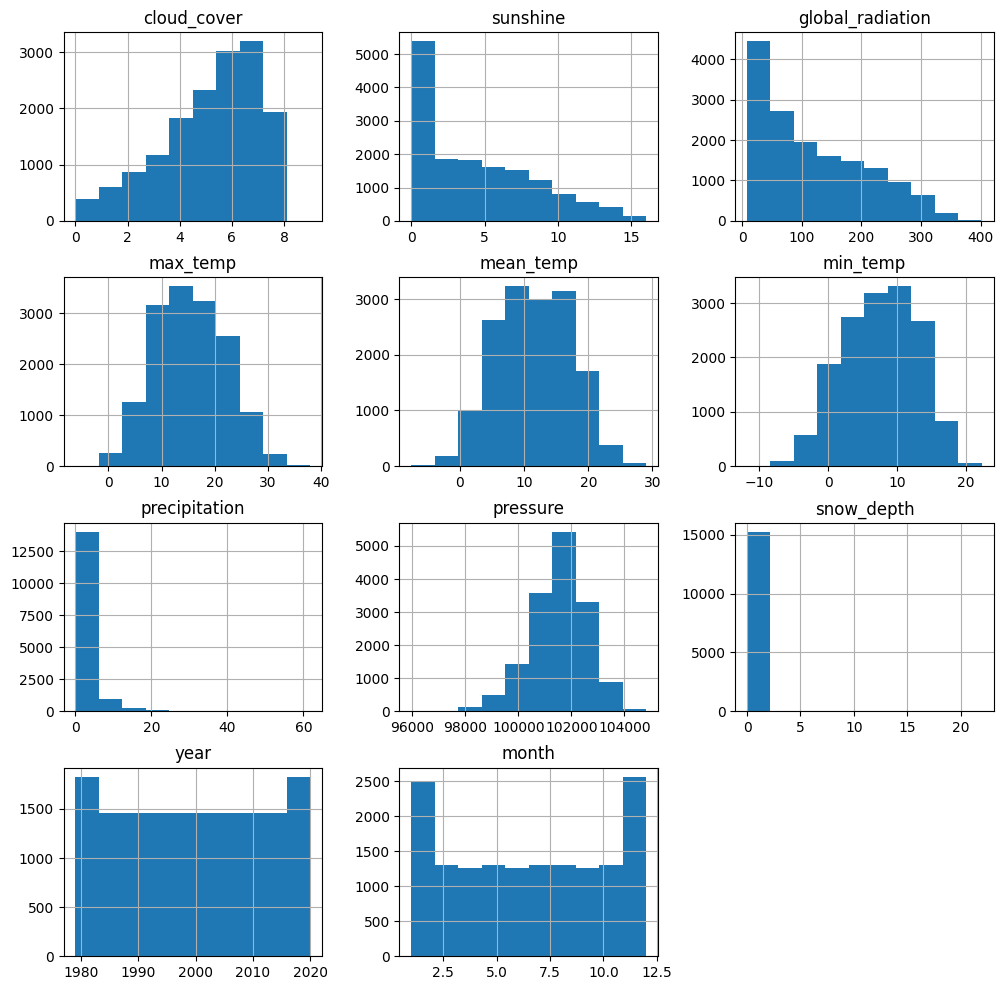

In [15]:
weather_df.hist(figsize=(12, 12))
plt.show()


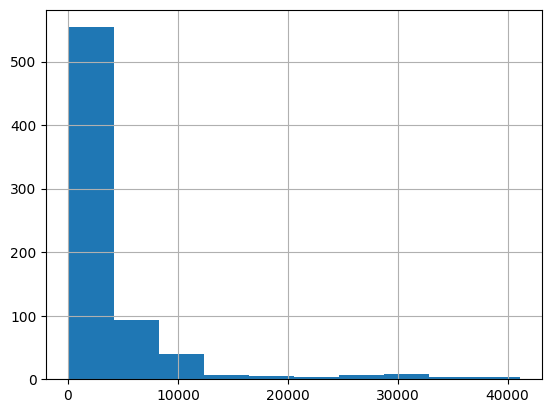

In [16]:
tourists_df["Charges"].hist()
plt.show()

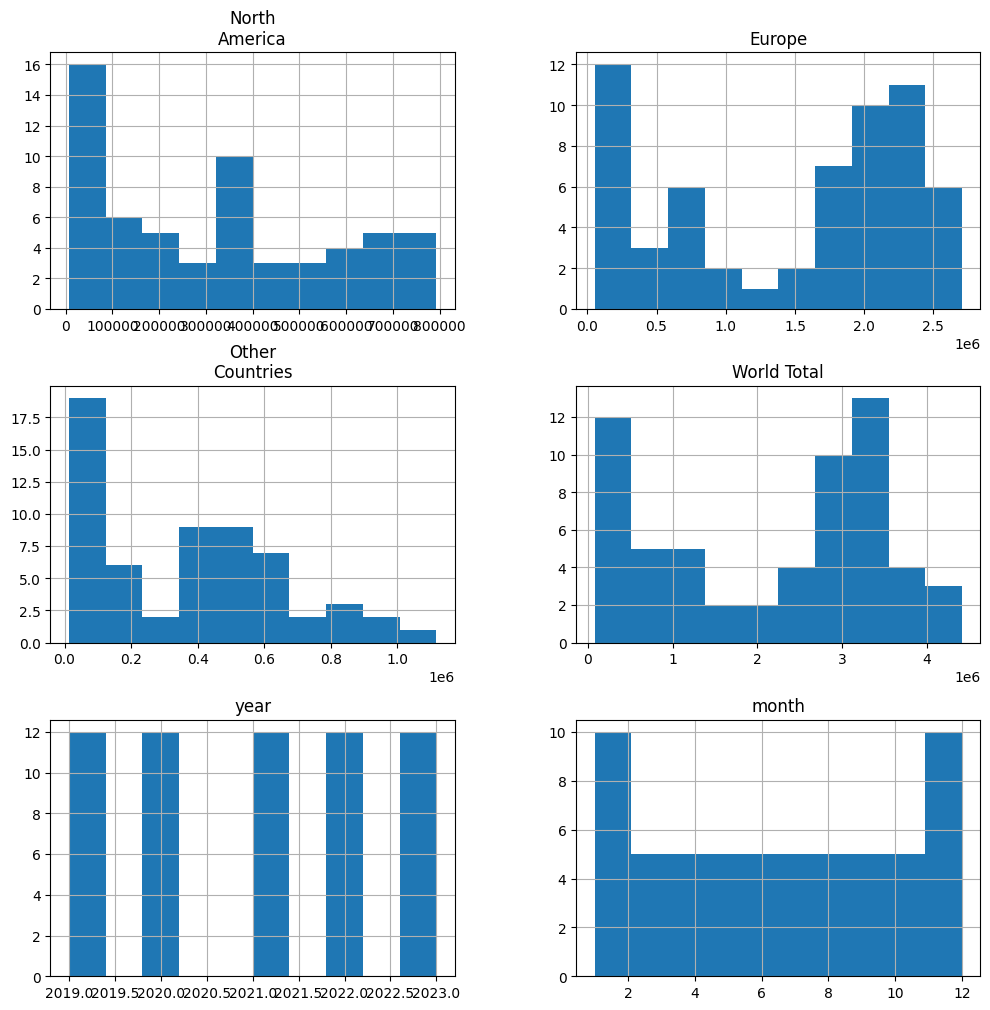

In [17]:
tourists_in_area_df.hist(figsize=(12, 12))
plt.show()

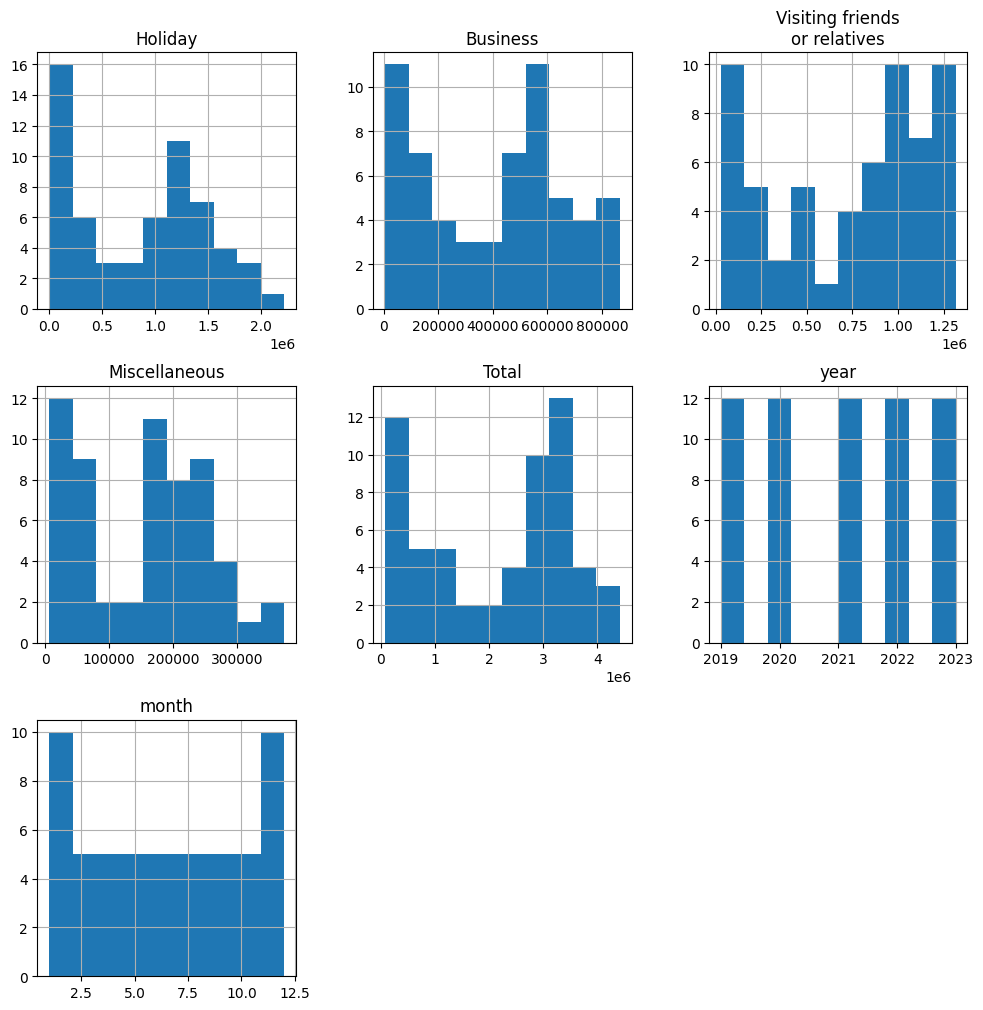

In [18]:
tourists_in_purpose_df.hist(figsize=(12, 12))
plt.show()

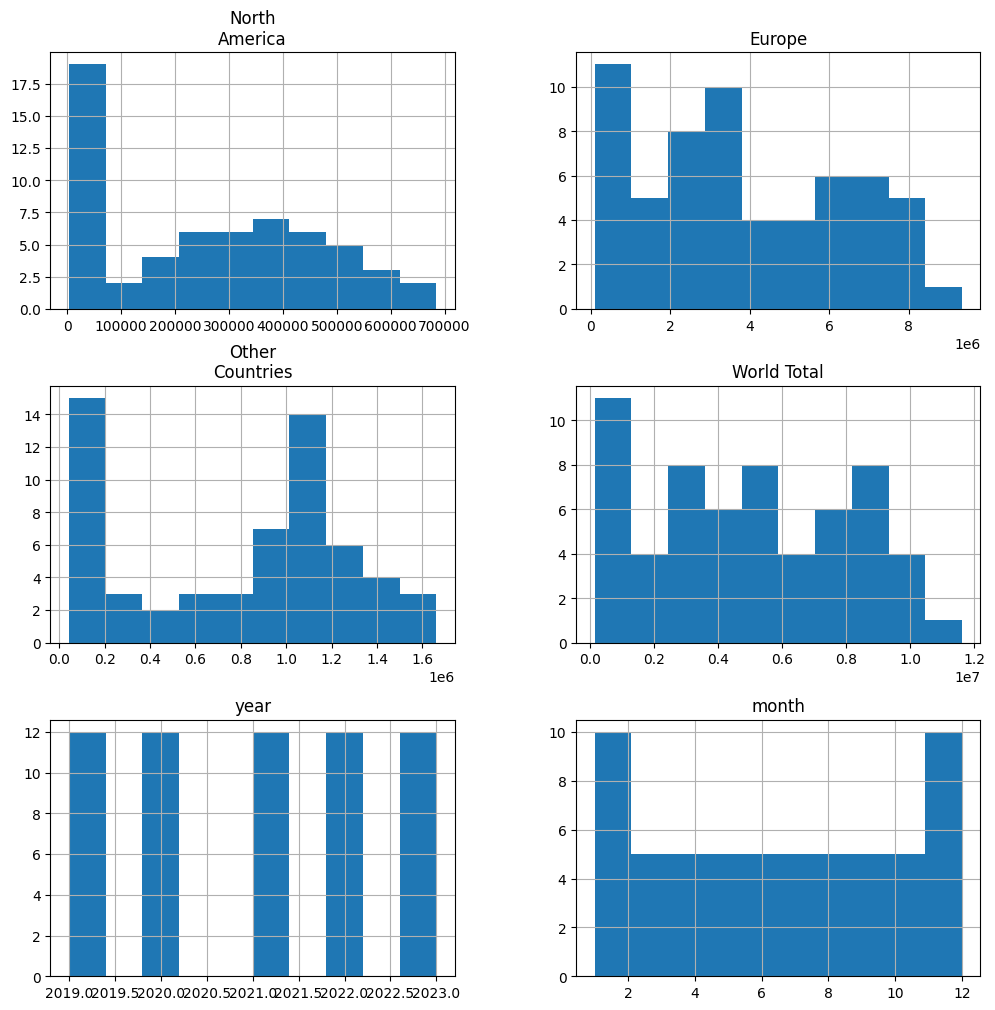

In [19]:
tourists_out_area_df.hist(figsize=(12, 12))
plt.show()

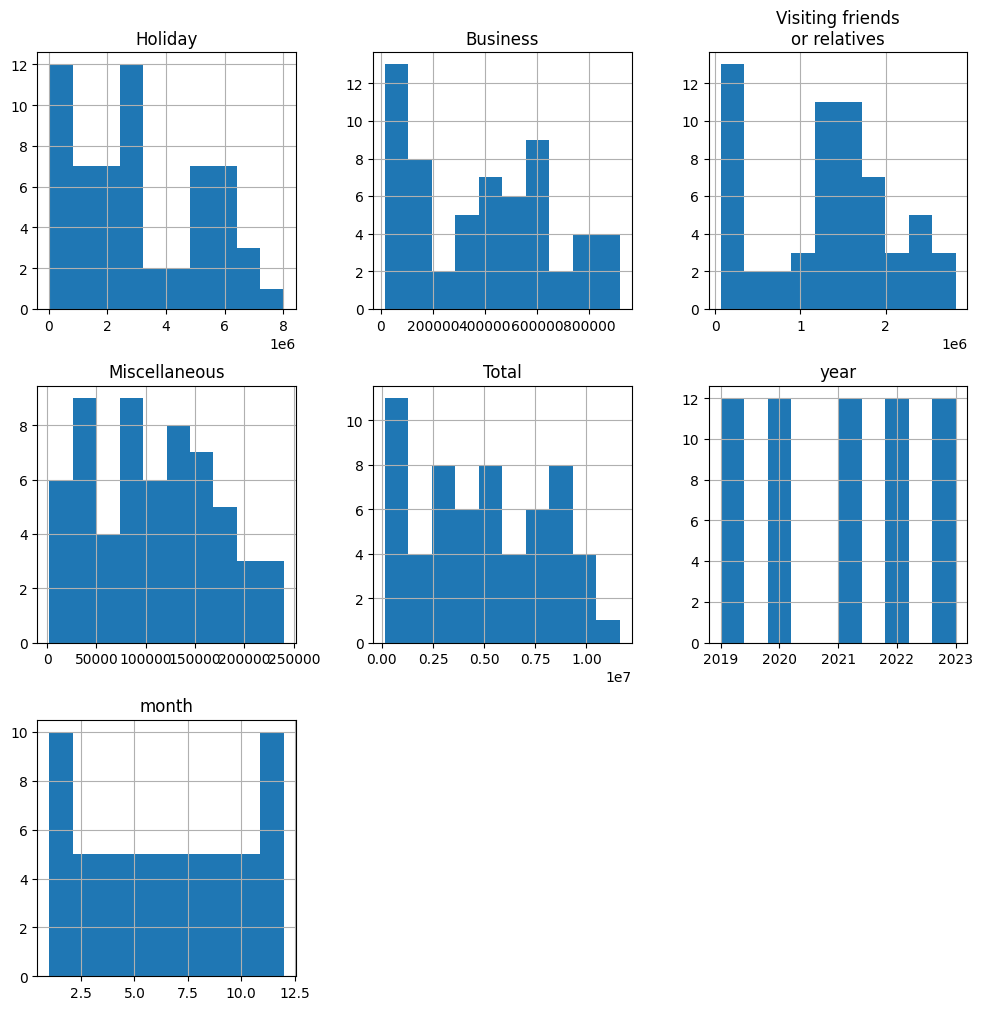

In [20]:
tourists_out_purpose_df.hist(figsize=(12, 12))
plt.show()

In [21]:
weather_df = weather_df.groupby(['year', 'month']).agg({
    'cloud_cover': 'mean',
    'sunshine': 'mean',
    'global_radiation': 'mean',
    'max_temp': 'max',
    'mean_temp': 'mean',
    'min_temp': 'min',
    'precipitation': 'mean',
    'pressure': 'mean',
    'snow_depth': 'mean',
})

In [22]:
weather_df

cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
year month                                                                 
1979 1         5.724138  1.887097         29.032258       9.1   0.616129   
     2         6.360000  1.889286         45.214286       9.7   2.042857   
     3         5.967742  3.212903         93.354839      15.3   5.587097   
     4         6.133333  3.543333        134.166667      22.4   8.743333   
     5         5.290323  6.470968        204.064516      26.2  11.490323   
...                 ...       ...               ...       ...        ...   
2020 8         5.000000  6.135484        210.741935      36.5  20.393333   
     9         4.200000  6.540000        170.000000      29.6  16.616667   
     10        5.774194  1.887097         72.516129      18.9  11.933333   
     11        5.933333  1.716667         43.166667      17.2   9.806667   
     12        5.466667  1.425806         27.967742      14.0   6.232258   

            min_temp  precipitation       pressure  snow_depth  
year month                                                      
1979 1          -7.5       1.932258  101214.838710    1.354839  
     2          -4.1       1.571429  101163.928571    0.107143  
     3          -3.0       3.061290  100459.032258    0.032258  
     4          -1.7       2.586667  101165.333333    0.000000  
     5          -0.9       2.806452  101362.580645    0.000000  
...              ...            ...            ...         ...  
2020 8           8.1       1.812903  101224.193548    0.000000  
     9           6.5       0.640000  101695.000000    0.000000  
     10          4.9       4.632258  100804.516129    0.000000  
     11         -0.6       1.660000  101939.000000    0.000000  
     12         -3.1       2.335484  100303.870968    0.000000  

[504 rows x 9 columns]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [23]:
weather_tourists_df = weather_df.merge(tourists_df, on=["year", "month"], how="inner")

weather_tourists_df

year  month  cloud_cover  sunshine  global_radiation  max_temp  \
0    1980      1     5.193548  2.335484         33.000000      11.4   
1    1980      2     6.275862  1.800000         46.000000      12.8   
2    1980      3     6.193548  2.683871         87.161290      13.9   
3    1980      4     5.100000  5.373333        158.966667      21.3   
4    1980      5     4.290323  7.132258        213.032258      26.2   
..    ...    ...          ...       ...               ...       ...   
486  2020      8     5.000000  6.135484        210.741935      36.5   
487  2020      9     4.200000  6.540000        170.000000      29.6   
488  2020     10     5.774194  1.887097         72.516129      18.9   
489  2020     11     5.933333  1.716667         43.166667      17.2   
490  2020     12     5.466667  1.425806         27.967742      14.0   

     mean_temp  min_temp  precipitation       pressure  snow_depth  Charges  
0     2.925806      -6.0       0.958065  101501.935484         0.0      739  
1     6.410345      -2.4       1.268966  101750.344828         0.0      602  
2     5.703226      -5.1       2.325806  100961.290323         0.0      740  
3     9.663333       0.8       0.720000  102207.333333         0.0     1028  
4    12.348387       0.5       0.841935  101639.354839         0.0     1088  
..         ...       ...            ...            ...         ...      ...  
486  20.393333       8.1       1.812903  101224.193548         0.0      993  
487  16.616667       6.5       0.640000  101695.000000         0.0      696  
488  11.933333       4.9       4.632258  100804.516129         0.0      570  
489   9.806667      -0.6       1.660000  101939.000000         0.0      358  
490   6.232258      -3.1       2.335484  100303.870968         0.0      458  

[491 rows x 12 columns]

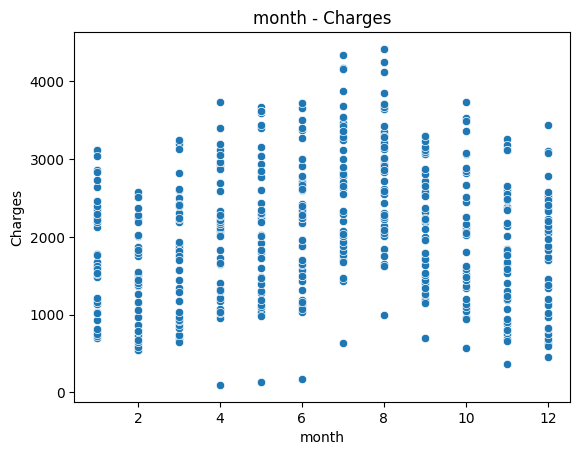

In [24]:
axes = sns.scatterplot(x=weather_tourists_df['month'], y=weather_tourists_df['Charges'])
plt.title('month - Charges')
plt.show()

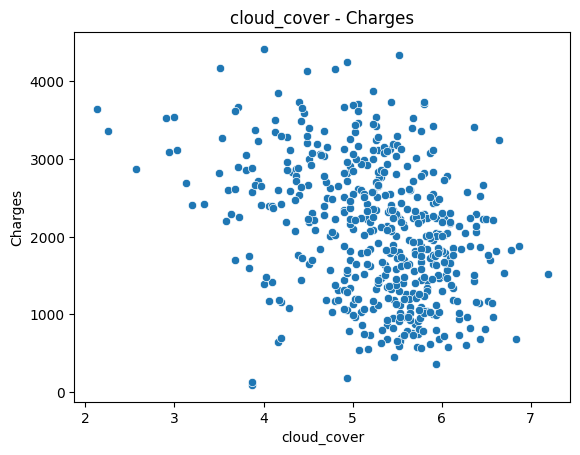

In [25]:
axes = sns.scatterplot(x=weather_tourists_df['cloud_cover'], y=weather_tourists_df['Charges'])
plt.title('cloud_cover - Charges')
plt.show()

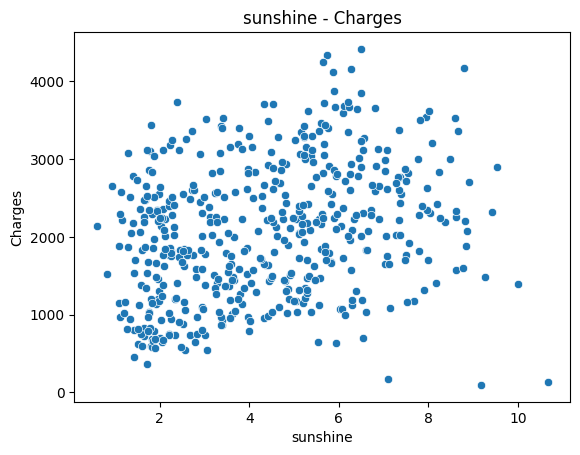

In [26]:
axes = sns.scatterplot(x=weather_tourists_df['sunshine'], y=weather_tourists_df['Charges'])
plt.title('sunshine - Charges')
plt.show()

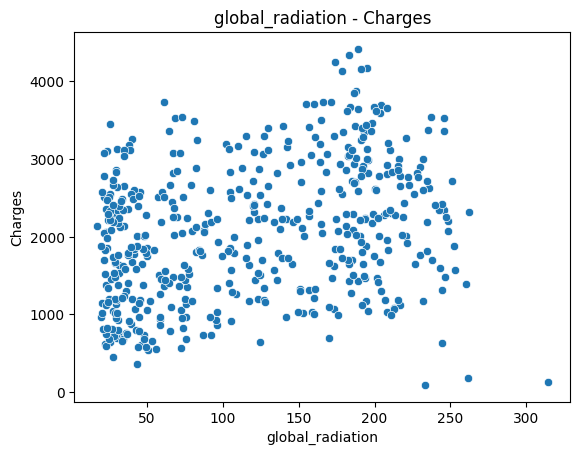

In [27]:
axes = sns.scatterplot(x=weather_tourists_df['global_radiation'], y=weather_tourists_df['Charges'])
plt.title('global_radiation - Charges')
plt.show()

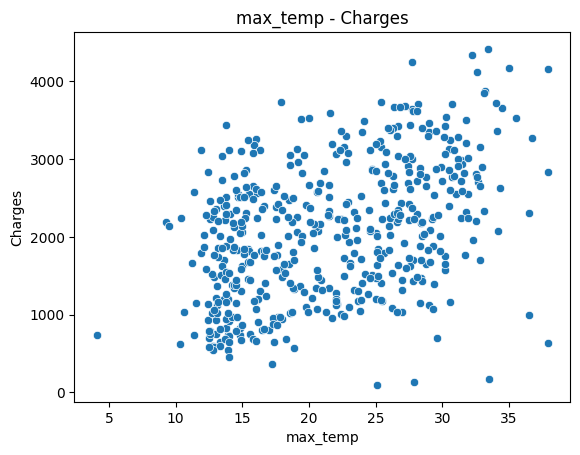

In [28]:
axes = sns.scatterplot(x=weather_tourists_df['max_temp'], y=weather_tourists_df['Charges'])
plt.title('max_temp - Charges')
plt.show()

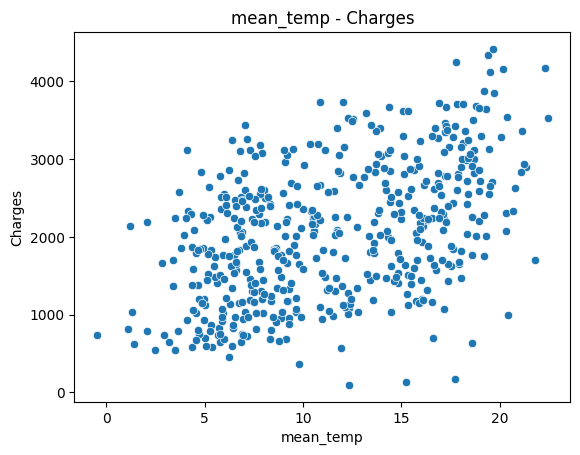

In [29]:
axes = sns.scatterplot(x=weather_tourists_df['mean_temp'], y=weather_tourists_df['Charges'])
plt.title('mean_temp - Charges')
plt.show()

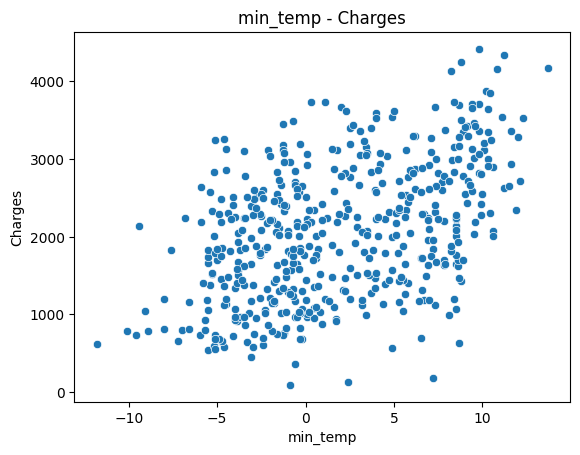

In [30]:
axes = sns.scatterplot(x=weather_tourists_df['min_temp'], y=weather_tourists_df['Charges'])
plt.title('min_temp - Charges')
plt.show()

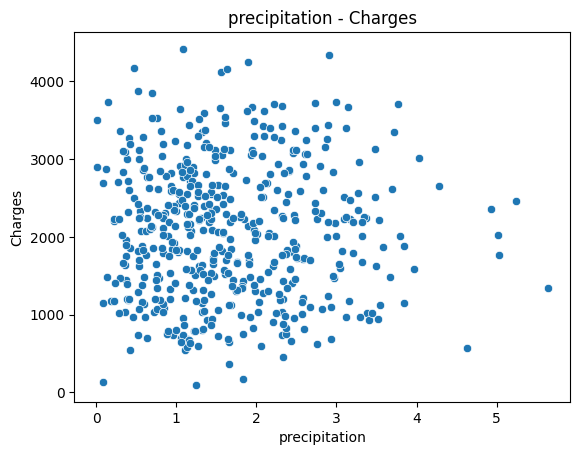

In [31]:
axes = sns.scatterplot(x=weather_tourists_df['precipitation'], y=weather_tourists_df['Charges'])
plt.title('precipitation - Charges')
plt.show()

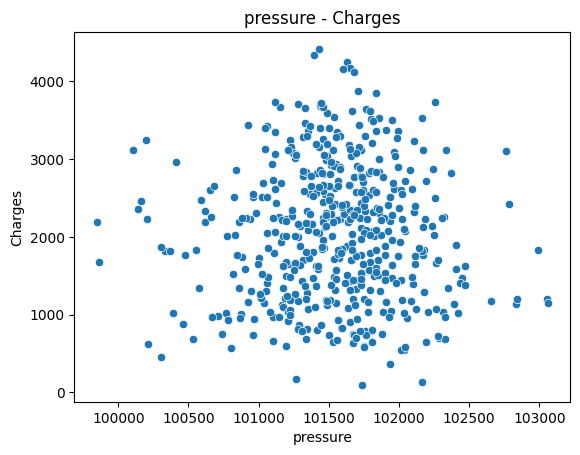

In [32]:
axes = sns.scatterplot(x=weather_tourists_df['pressure'], y=weather_tourists_df['Charges'])
plt.title('pressure - Charges')
plt.show()

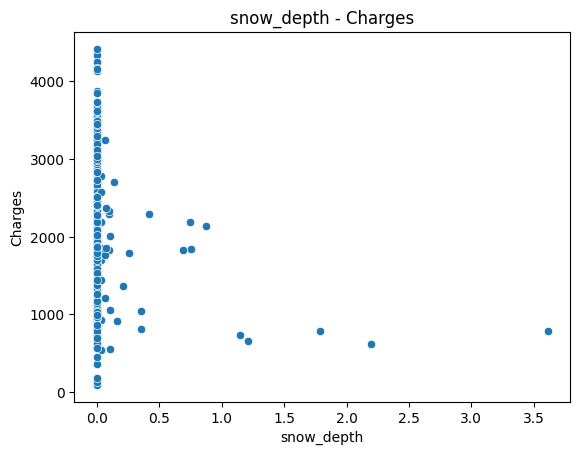

In [33]:
axes = sns.scatterplot(x=weather_tourists_df['snow_depth'], y=weather_tourists_df['Charges'])
plt.title('snow_depth - Charges')
plt.show()

In [34]:
weather_tourists_df.iloc[:, 2:].corr()["Charges"]

cloud_cover        -0.359460
sunshine            0.290308
global_radiation    0.300951
max_temp            0.430676
mean_temp           0.465640
min_temp            0.467588
precipitation       0.010059
pressure           -0.011278
snow_depth         -0.149661
Charges             1.000000
Name: Charges, dtype: float64

In [35]:
df = pd.DataFrame()

for i in range(1,13):   
    df[i] = weather_tourists_df[weather_tourists_df["month"] == i].iloc[:, 2:].corr()["Charges"]
df

1         2         3         4         5         6   \
cloud_cover      -0.207468 -0.225327 -0.232149 -0.301592 -0.199832 -0.379960   
sunshine         -0.106348  0.114867  0.146216 -0.116922 -0.208947 -0.015980   
global_radiation  0.013705  0.208950  0.137958 -0.173077 -0.311309 -0.266662   
max_temp          0.166422  0.288868  0.251435  0.233832  0.249172  0.286148   
mean_temp         0.277278  0.374297  0.273355  0.372001  0.315439  0.436517   
min_temp          0.279795  0.318134  0.142560  0.462501  0.244380  0.415593   
precipitation     0.084790  0.271536 -0.078848 -0.090681  0.080157 -0.073554   
pressure         -0.060590 -0.205047  0.029412 -0.053364 -0.032161  0.139404   
snow_depth       -0.200872 -0.247877 -0.072406  0.124703       NaN       NaN   
Charges           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

                        7         8         9         10        11        12  
cloud_cover      -0.305118 -0.238301 -0.351024 -0.205054 -0.252079 -0.220817  
sunshine          0.062336 -0.187194 -0.012427 -0.017538  0.019237  0.039351  
global_radiation -0.229006 -0.267350 -0.120526 -0.103651 -0.003903  0.012066  
max_temp          0.156099  0.038077  0.115267  0.235980 -0.007156  0.140911  
mean_temp         0.329050  0.089165  0.291258  0.413777  0.145897  0.224410  
min_temp          0.572363  0.309916  0.187679  0.169472  0.065902  0.316463  
precipitation     0.075909  0.159357  0.025751 -0.331507  0.293001  0.060080  
pressure         -0.269897 -0.120644  0.105569  0.287525 -0.236563  0.138319  
snow_depth             NaN       NaN       NaN       NaN       NaN -0.181729  
Charges           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

In [36]:
corr_w_t = df.T.mean()
corr_w_t = pd.DataFrame(corr_w_t)
corr_w_t.rename(columns={0: "corr"}, inplace=True)
corr_w_t = corr_w_t.drop(corr_w_t.tail(1).index)
corr_w_t

corr
cloud_cover      -0.259893
sunshine         -0.023613
global_radiation -0.091901
max_temp          0.179588
mean_temp         0.295204
min_temp          0.290396
precipitation     0.039666
pressure         -0.023170
snow_depth       -0.115636

In [37]:
#перевірка статистичної гіпотези про корельованість змінних, при рівні значимості a = 0.01 (За критерієм Стьюдента)
# H0: r = 0
# H1: r != 0 
t_cr = 2.7
corr_w_t["t"] = corr_w_t["corr"].apply(lambda r: r*33/((1-r**2)**0.5))
corr_w_t["H0"] = corr_w_t["t"].apply(lambda t: True if abs(t)<t_cr else False)
corr_w_t

corr          t     H0
cloud_cover      -0.259893  -8.881681  False
sunshine         -0.023613  -0.779432   True
global_radiation -0.091901  -3.045611  False
max_temp          0.179588   6.024345  False
mean_temp         0.295204  10.196118  False
min_temp          0.290396  10.014649  False
precipitation     0.039666   1.310008   True
pressure         -0.023170  -0.764810   True
snow_depth       -0.115636  -3.841762  False

In [38]:
# кореляція з місяцями
weather_tourists_df[["Charges", "month"]].corr()


Charges     month
Charges  1.000000  0.120524
month    0.120524  1.000000

Гіпотезу про нульову кореляцію приймаємо для Charges та sunshine, precipitation, pressure. 

In [39]:
y_data1 = weather_tourists_df['Charges']
x_data1=weather_tourists_df.drop('Charges',axis=1)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size=0.20, random_state=1)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 99
number of training samples: 392


In [40]:
f_m = np.polyfit(x_train1['month'], y_train1, 2)

p_m = np.poly1d(f_m)

print('The R-square for test data is: ', r2_score(y_test1, p_m(x_test1[["month"]])))

The R-square for test data is:  0.003148397714835438


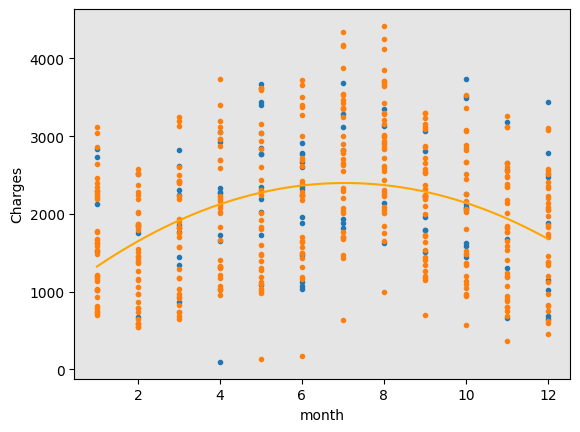

In [41]:
x_new = np.linspace(1, 12, 100)

plt.plot(x_test1[['month']], y_test1, '.')
plt.plot(x_train1[['month']], y_train1, '.')
plt.plot(x_new, p_m(x_new), color='orange')

# plt.title("Models visualization")
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('month')
plt.ylabel("Charges")

plt.show()
plt.close()

In [42]:
f_c = np.polyfit(x_train1['cloud_cover'], y_train1, 2)

p_c = np.poly1d(f_c)

print('The R-square for test data is: ', r2_score(y_test1, p_c(x_test1[['cloud_cover']])))

The R-square for test data is:  0.03321056850878379


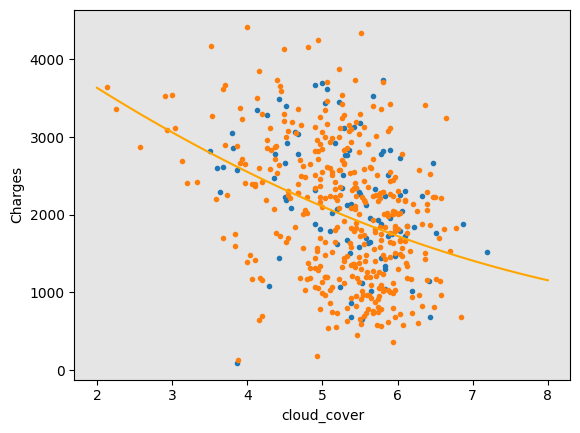

In [43]:
x_new = np.linspace(2, 8, 100)

plt.plot(x_test1[['cloud_cover']], y_test1, '.')
plt.plot(x_train1[['cloud_cover']], y_train1, '.')
plt.plot(x_new, p_c(x_new), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('cloud_cover')
plt.ylabel("Charges")

plt.show()
plt.close()

In [44]:
f_m_t = np.polyfit(x_train1['mean_temp'], y_train1, 2)

p_m_t = np.poly1d(f_m_t)

print('The R-square for test data is: ', r2_score(y_test1, p_m_t(x_test1[['mean_temp']])))

The R-square for test data is:  0.04245136545717476


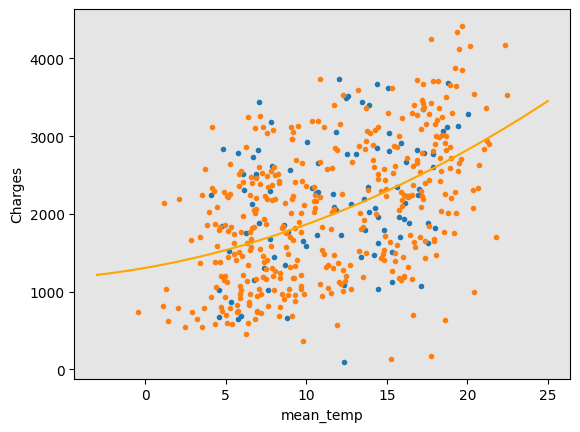

In [45]:
x_new = np.linspace(-3, 25, 100)

plt.plot(x_test1[['mean_temp']], y_test1, '.')
plt.plot(x_train1[['mean_temp']], y_train1, '.')
plt.plot(x_new, p_m_t(x_new), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('mean_temp')
plt.ylabel("Charges")

plt.show()
plt.close()

In [46]:
f_s = np.polyfit(x_train1['snow_depth'], y_train1, 2)

p_s = np.poly1d(f_s)

print('The R-square for test data is: ', r2_score(y_test1, p_s(x_test1[['snow_depth']])))

The R-square for test data is:  -0.03598201574511872


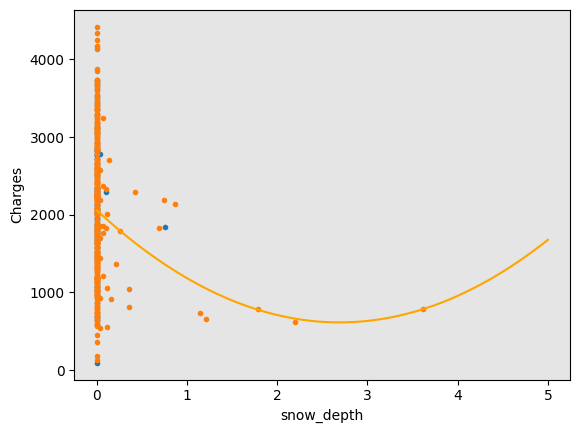

In [47]:
x_new = np.linspace(0, 5, 100)

plt.plot(x_test1[['snow_depth']], y_test1, '.')
plt.plot(x_train1[['snow_depth']], y_train1, '.')
plt.plot(x_new, p_s(x_new), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('snow_depth')
plt.ylabel("Charges")

plt.show()
plt.close()

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)


In [49]:
z_train_1 = x_train1[['cloud_cover', 'mean_temp', "snow_depth", "month"]]
z_test_1 = x_test1[['cloud_cover', 'mean_temp', "snow_depth", "month"]]

In [50]:
pipe.fit(z_train_1, y_train1)
ypipe_w_t=pipe.predict(z_test_1)

print('The R-square for test data is: ', r2_score(y_test1, ypipe_w_t))


The R-square for test data is:  0.06880909911800748


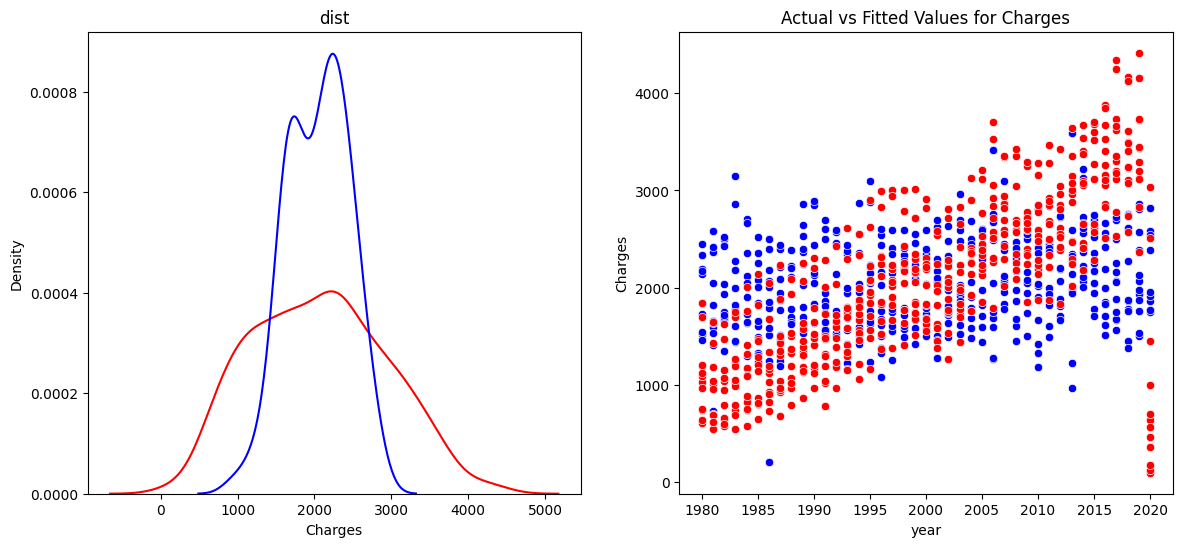

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.distplot(weather_tourists_df['Charges'], hist=False, color="r", label="Actual Value", ax=axes[0])
sns.distplot(ypipe_w_t, hist=False, color="b", label="Fitted Values", ax=axes[0])

sns.scatterplot(x=weather_tourists_df.sort_values(by=["year"])["year"],
                 y=pipe.predict(weather_tourists_df.sort_values(by=["year"])[["cloud_cover", "mean_temp", "snow_depth", "month"]]), color='b', ax=axes[1])
sns.scatterplot(x=weather_tourists_df["year"], y=weather_tourists_df["Charges"], color='r', ax=axes[1])

axes[0].set_title('dist')
axes[1].set_title('scatter')

plt.title("Actual vs Fitted Values for Charges")


plt.show()
plt.close()

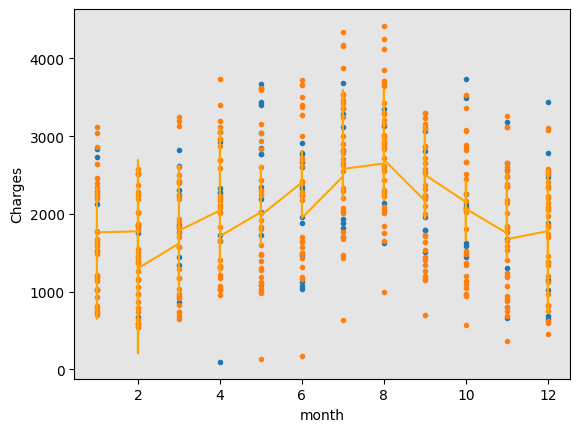

In [52]:
x_new = np.linspace(1, 12, 100)

plt.plot(x_test1[['month']], y_test1, '.')
plt.plot(x_train1[['month']], y_train1, '.')
plt.plot(weather_tourists_df.sort_values(by=["month"])["month"], pipe.predict(weather_tourists_df.sort_values(by=["month"])[['cloud_cover', 'mean_temp', "snow_depth", "month"]]), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('month')
plt.ylabel("Charges")

plt.show()
plt.close()

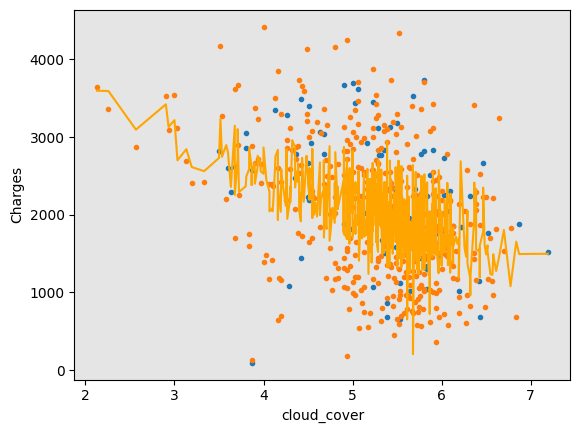

In [53]:
x_new = np.linspace(2, 8, 100)

plt.plot(x_test1[['cloud_cover']], y_test1, '.')
plt.plot(x_train1[['cloud_cover']], y_train1, '.')
plt.plot(weather_tourists_df.sort_values(by=["cloud_cover"])["cloud_cover"], pipe.predict(weather_tourists_df.sort_values(by=["cloud_cover"])[['cloud_cover', 'mean_temp', "snow_depth", "month"]]), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('cloud_cover')
plt.ylabel("Charges")

plt.show()
plt.close()

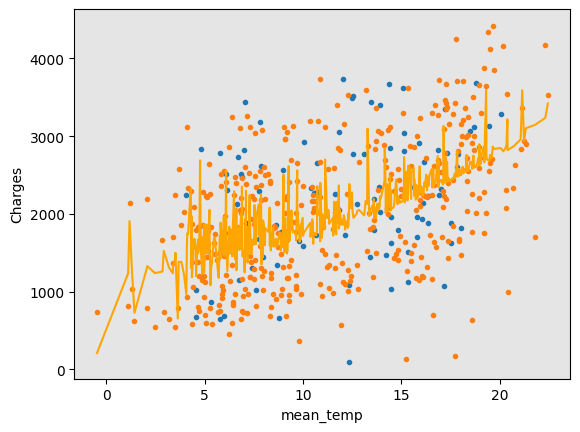

In [54]:
x_new = np.linspace(1, 12, 100)

plt.plot(x_test1[['mean_temp']], y_test1, '.')
plt.plot(x_train1[['mean_temp']], y_train1, '.')
plt.plot(weather_tourists_df.sort_values(by=["mean_temp"])["mean_temp"], pipe.predict(weather_tourists_df.sort_values(by=["mean_temp"])[['cloud_cover', 'mean_temp', "snow_depth", "month"]]), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('mean_temp')
plt.ylabel("Charges")

plt.show()
plt.close()

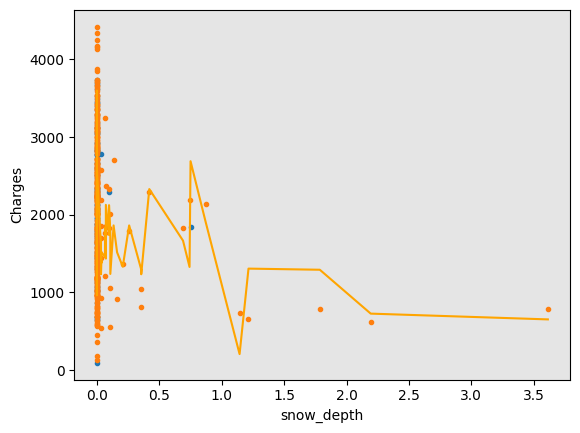

In [55]:
x_new = np.linspace(1, 12, 100)

plt.plot(x_test1[['snow_depth']], y_test1, '.')
plt.plot(x_train1[['snow_depth']], y_train1, '.')
plt.plot(weather_tourists_df.sort_values(by=["snow_depth"])["snow_depth"], pipe.predict(weather_tourists_df.sort_values(by=["snow_depth"])[['cloud_cover', 'mean_temp', "snow_depth", "month"]]), color='orange')

ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('snow_depth')
plt.ylabel("Charges")

plt.show()
plt.close()

По кожному місяцю окремо

The R-square for test data in 1 month is:  0.013744389409760305


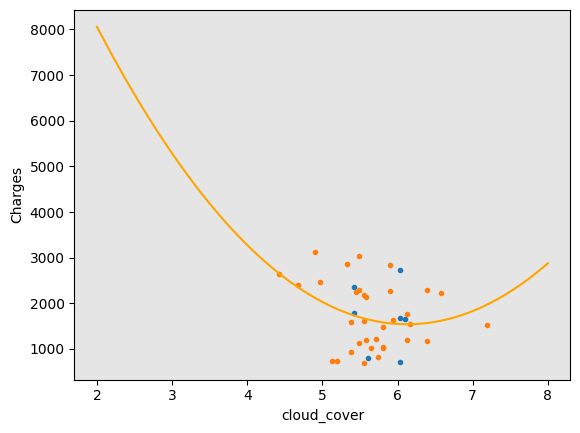

The R-square for test data in 2 month is:  0.08379300034826342


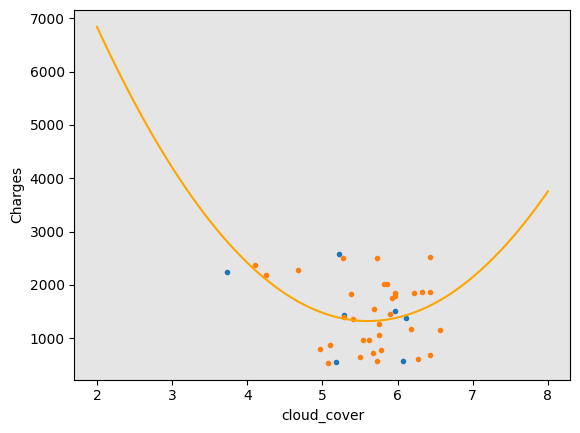

The R-square for test data in 3 month is:  -0.4975151853365545


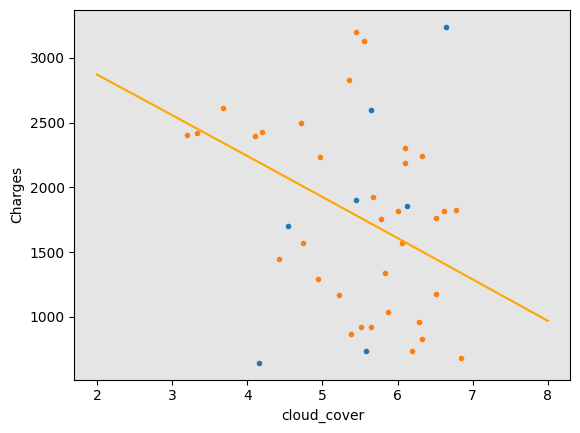

The R-square for test data in 4 month is:  -0.04350788494344804


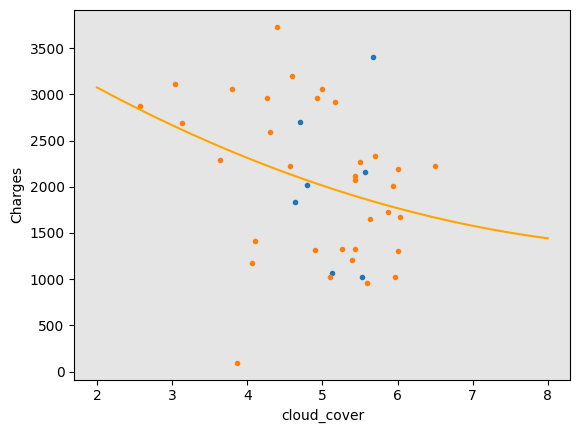

The R-square for test data in 5 month is:  -0.6770690176256582


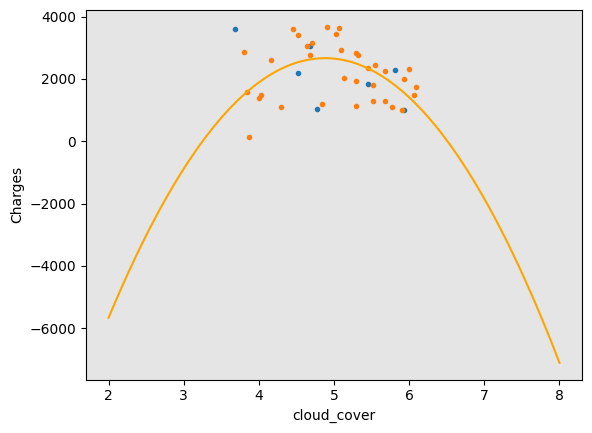

The R-square for test data in 6 month is:  0.38024009392212943


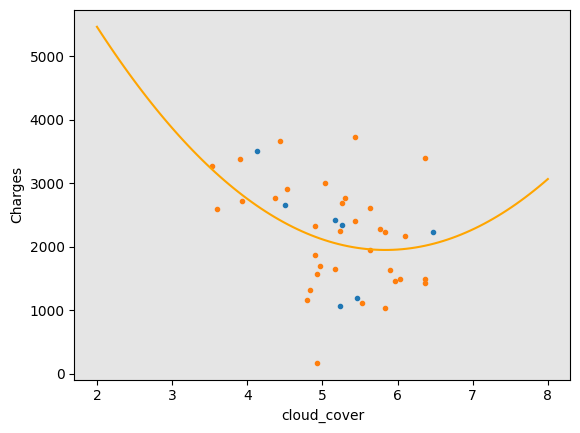

The R-square for test data in 7 month is:  0.08379345264957194


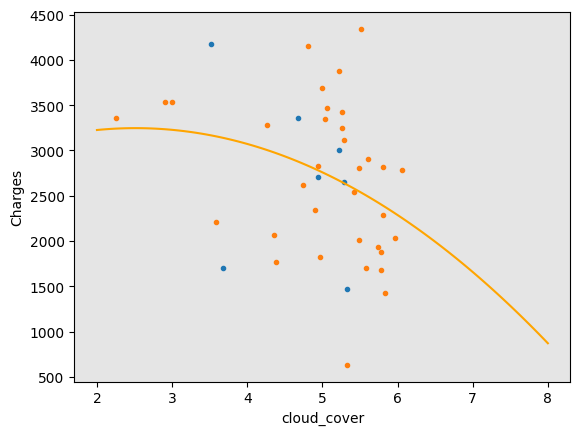

The R-square for test data in 8 month is:  -0.20749158544870627


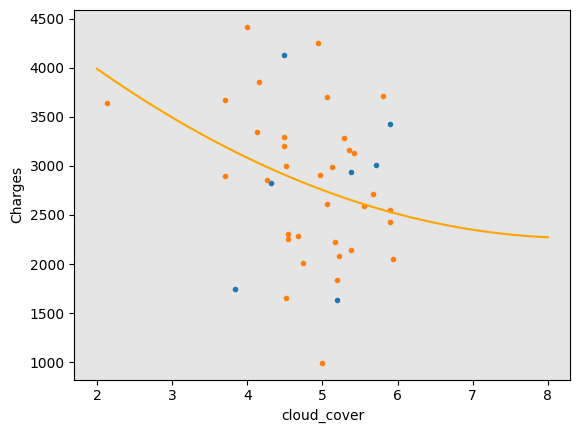

The R-square for test data in 9 month is:  0.08986405950461718


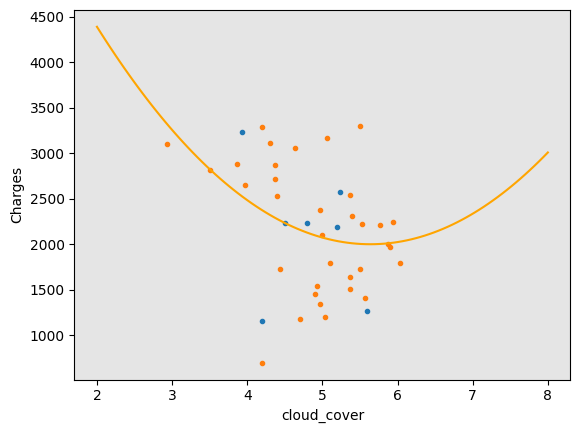

The R-square for test data in 10 month is:  -0.14443822668906603


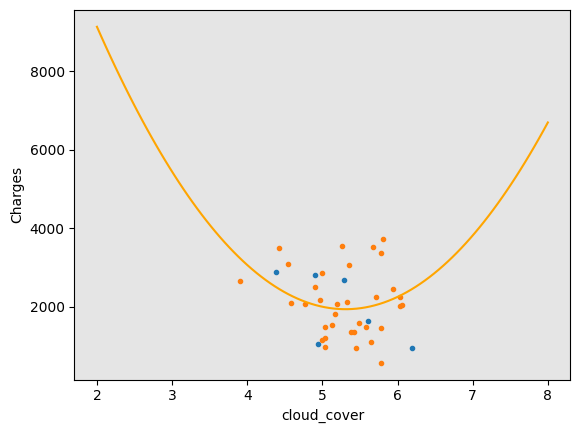

The R-square for test data in 11 month is:  0.05724233315944016


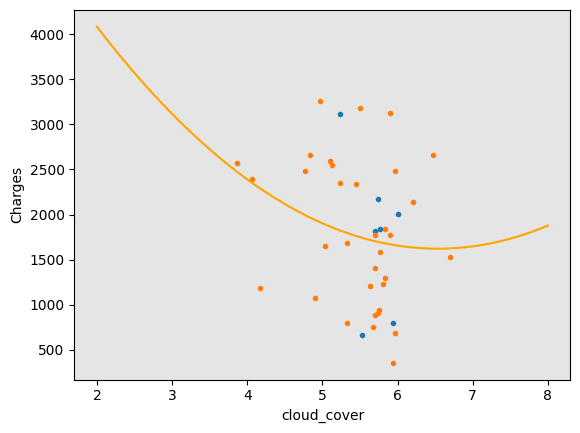

The R-square for test data in 12 month is:  -0.14212936648653107


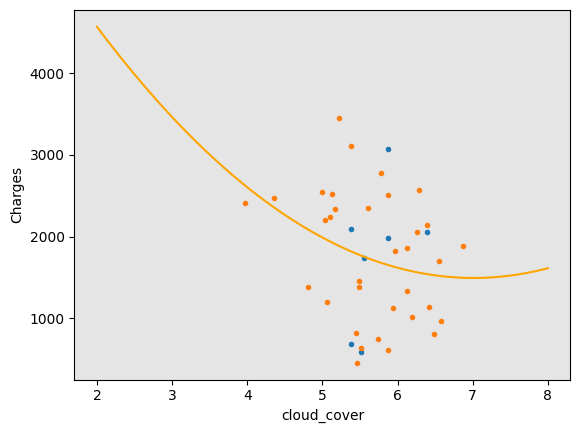

In [56]:
for i in range(1,13):
    y_data1 = weather_tourists_df.loc[weather_tourists_df["month"] == i]['Charges']
    x_data1=weather_tourists_df.drop('Charges',axis=1).loc[weather_tourists_df["month"] == i]

    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size=0.15, random_state=1)
    f_c = np.polyfit(x_train1['cloud_cover'], y_train1, 2)

    p_c = np.poly1d(f_c)

    print(f'The R-square for test data in {i} month is: ', r2_score(y_test1, p_c(x_test1[['cloud_cover']])))

    
    x_new = np.linspace(2, 8, 100)

    plt.plot(x_test1[['cloud_cover']], y_test1, '.')
    plt.plot(x_train1[['cloud_cover']], y_train1, '.')
    plt.plot(x_new, p_c(x_new), color='orange')

    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('cloud_cover')
    plt.ylabel("Charges")

    plt.show()
    plt.close()

The R-square for test data in 1 month is:  0.08489314485564914


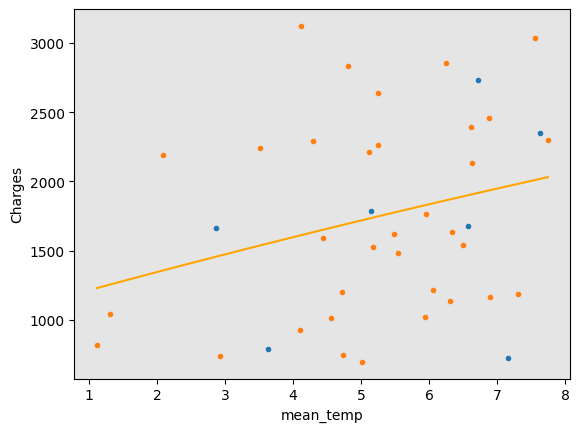

The R-square for test data in 2 month is:  0.035156250350619755


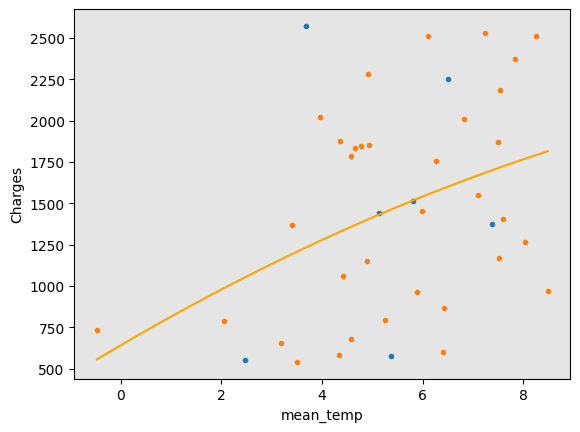

The R-square for test data in 3 month is:  -0.10958668420368922


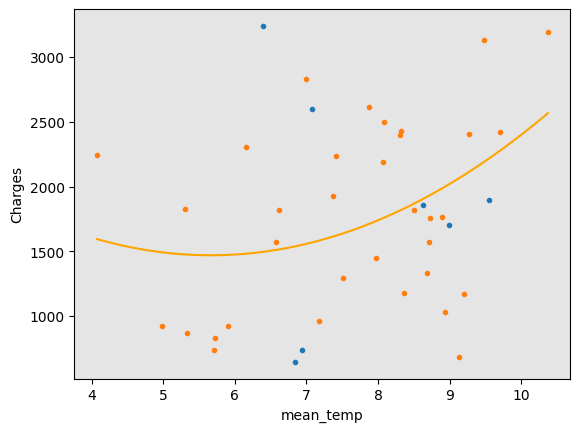

The R-square for test data in 4 month is:  0.32174072641092566


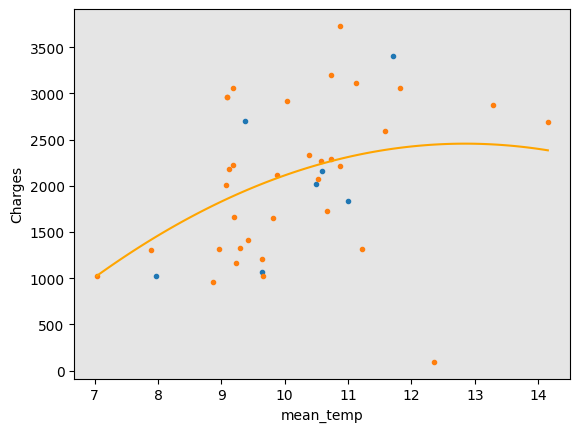

The R-square for test data in 5 month is:  -0.08397965107833838


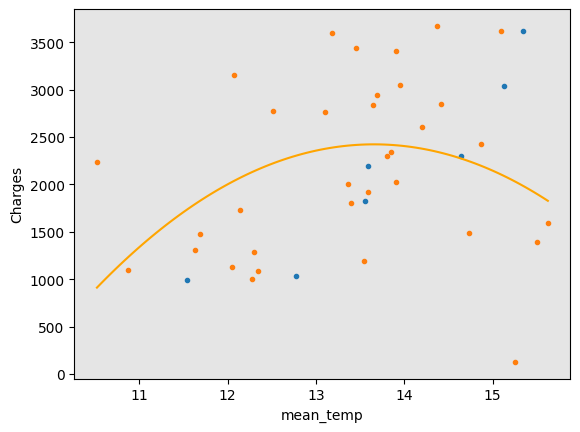

The R-square for test data in 6 month is:  0.14980694848846265


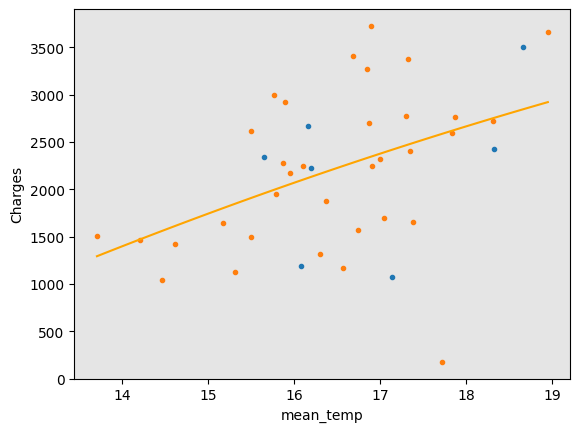

The R-square for test data in 7 month is:  0.015957792056762177


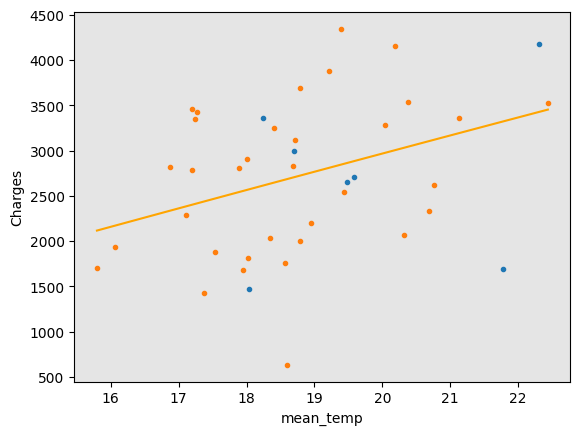

The R-square for test data in 8 month is:  -0.14154953267584958


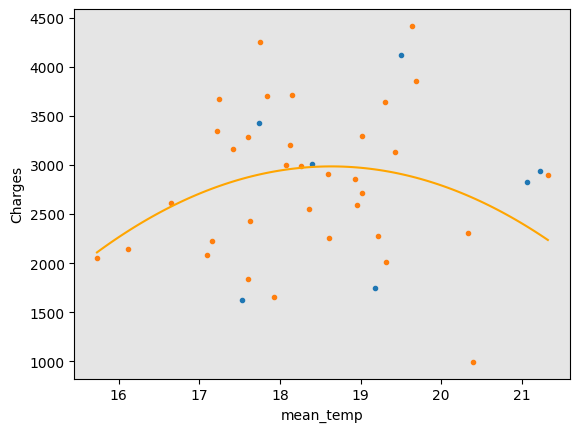

The R-square for test data in 9 month is:  -0.0345932434675047


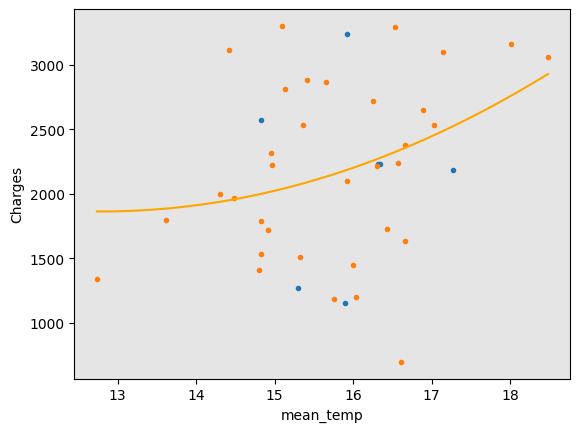

The R-square for test data in 10 month is:  0.18217470124601687


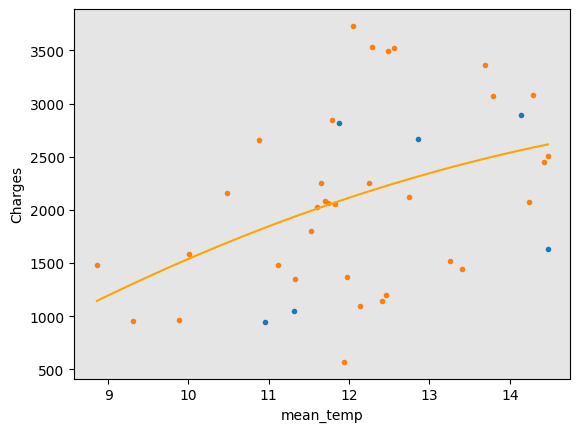

The R-square for test data in 11 month is:  -0.044595526655451634


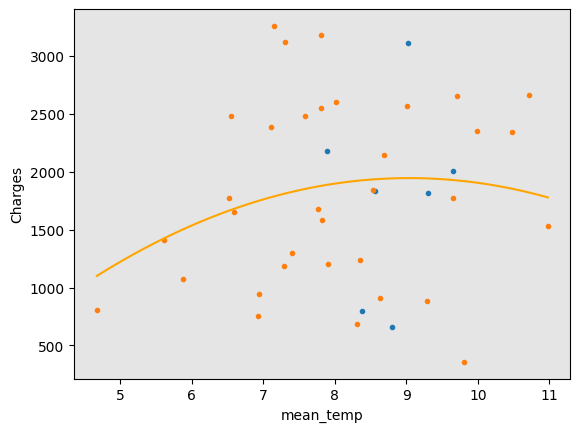

The R-square for test data in 12 month is:  0.13237943967858634


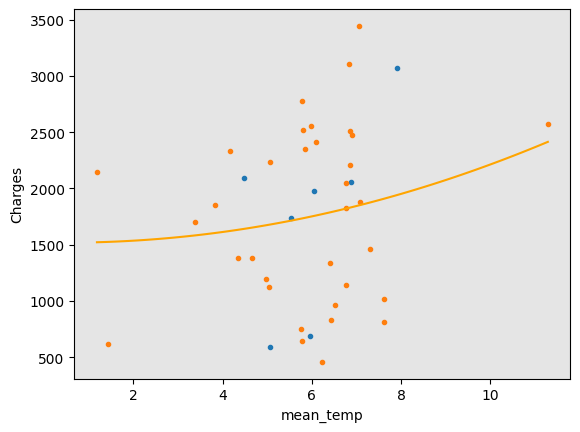

In [57]:
for i in range(1,13):
    y_data1 = weather_tourists_df.loc[weather_tourists_df["month"] == i]['Charges']
    x_data1=weather_tourists_df.drop('Charges',axis=1).loc[weather_tourists_df["month"] == i]

    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size=0.15, random_state=1)
    f_c = np.polyfit(x_train1['mean_temp'], y_train1, 2)

    p_c = np.poly1d(f_c)

    print(f'The R-square for test data in {i} month is: ', r2_score(y_test1, p_c(x_test1[['mean_temp']])))

    
    x_new = np.linspace(x_train1['mean_temp'].min(), x_train1['mean_temp'].max(), 100)

    plt.plot(x_test1[['mean_temp']], y_test1, '.')
    plt.plot(x_train1[['mean_temp']], y_train1, '.')
    plt.plot(x_new, p_c(x_new), color='orange')

    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('mean_temp')
    plt.ylabel("Charges")

    plt.show()
    plt.close()

The R-square for test data is:  0.2120455717178501
The mean square error of actual and predicted value for 1 month is:  3.69134458e+05


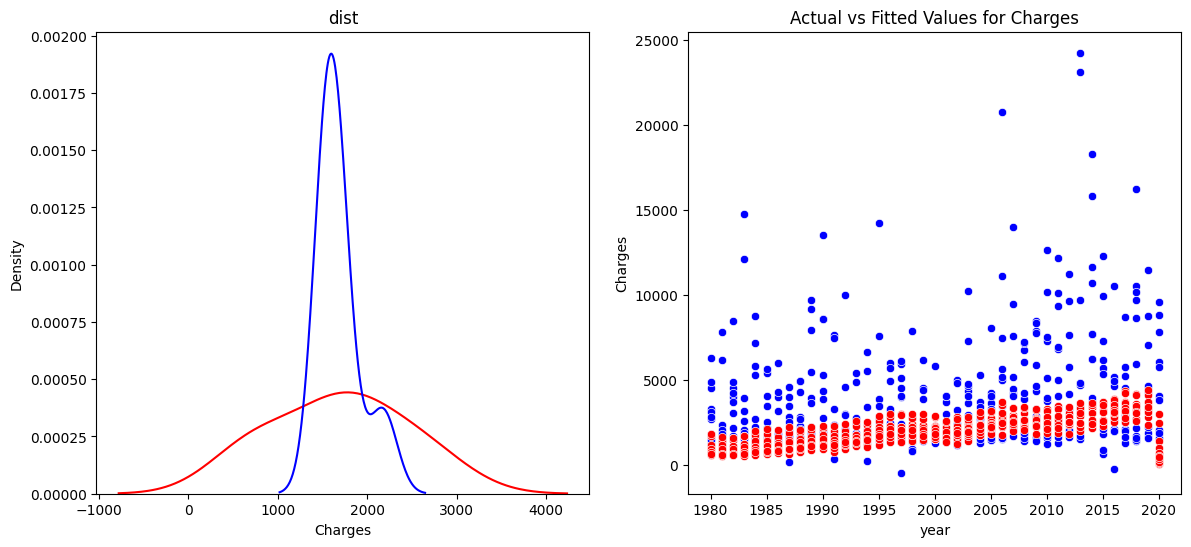

The R-square for test data is:  0.14086045235346667
The mean square error of actual and predicted value for 2 month is:  4.26712942e+05


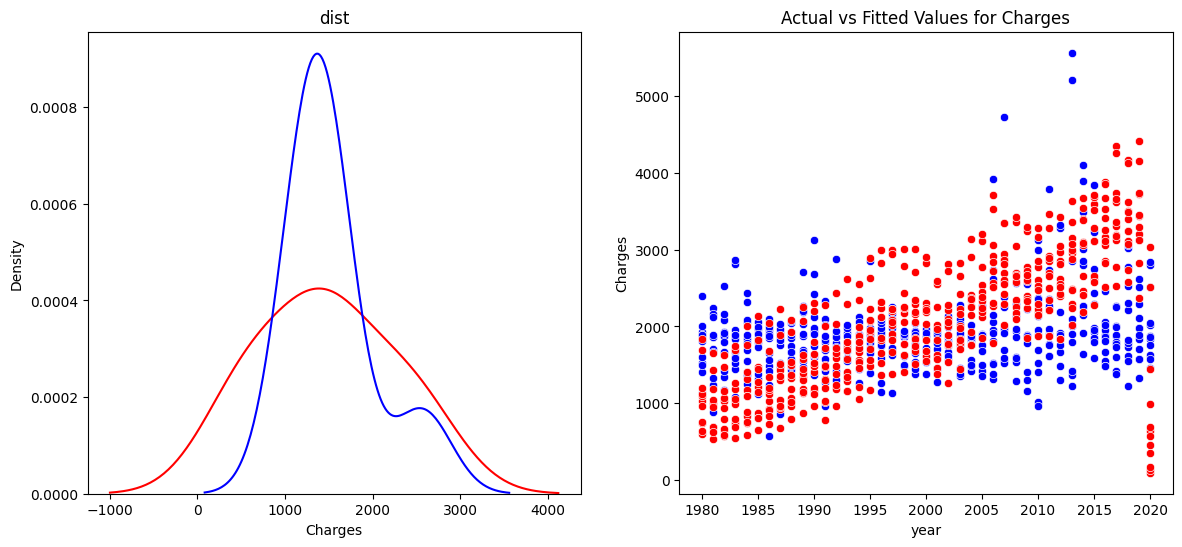

The R-square for test data is:  -0.2961770228611704
The mean square error of actual and predicted value for 3 month is:  9.60260315e+05


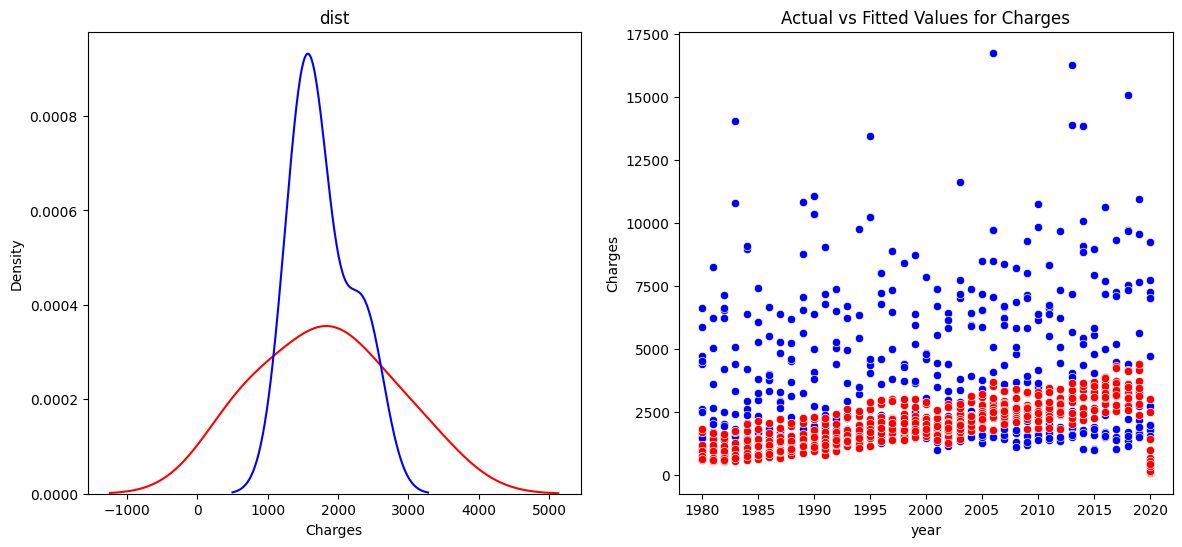

The R-square for test data is:  -0.15035580549783378
The mean square error of actual and predicted value for 4 month is:  7.10598023e+05


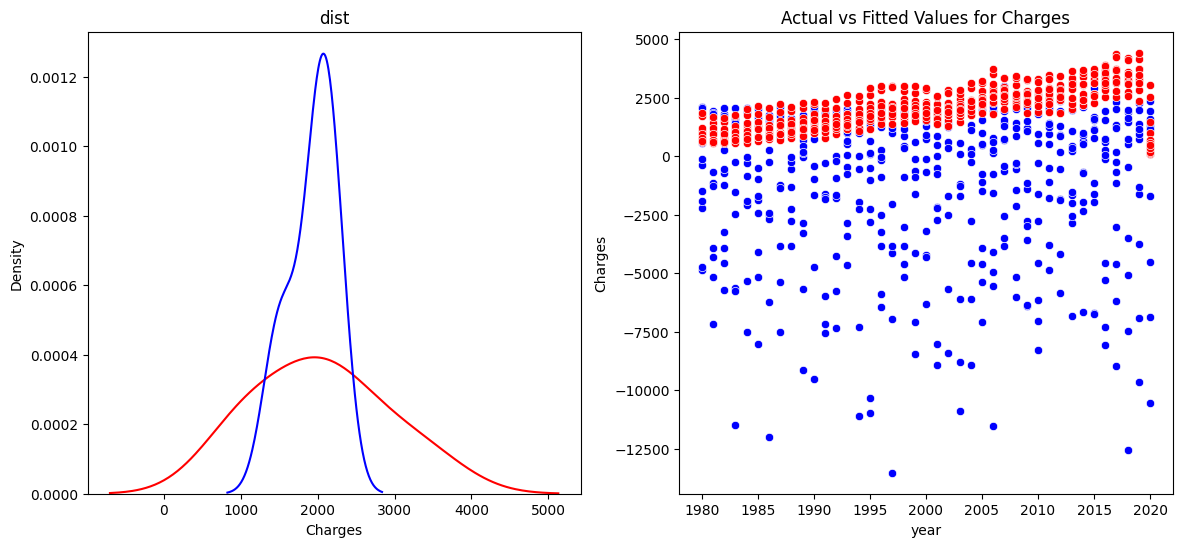

The R-square for test data is:  -0.610709600506387
The mean square error of actual and predicted value for 5 month is:  1.30274350e+06


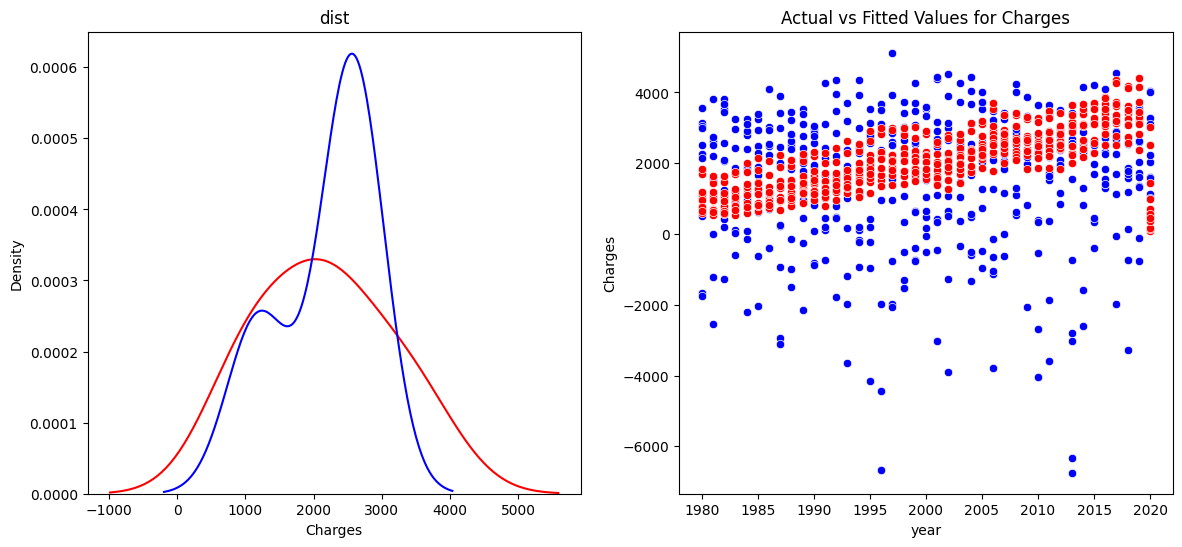

The R-square for test data is:  0.1289871943222436
The mean square error of actual and predicted value for 6 month is:  5.33329460e+05


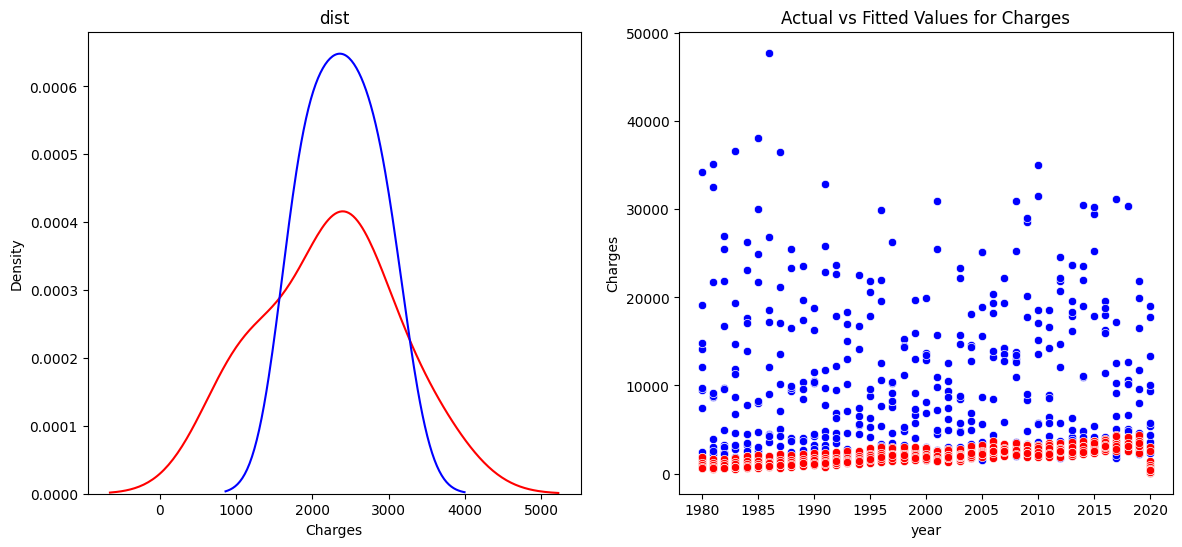

The R-square for test data is:  0.022355267283308167
The mean square error of actual and predicted value for 7 month is:  7.26660904e+05


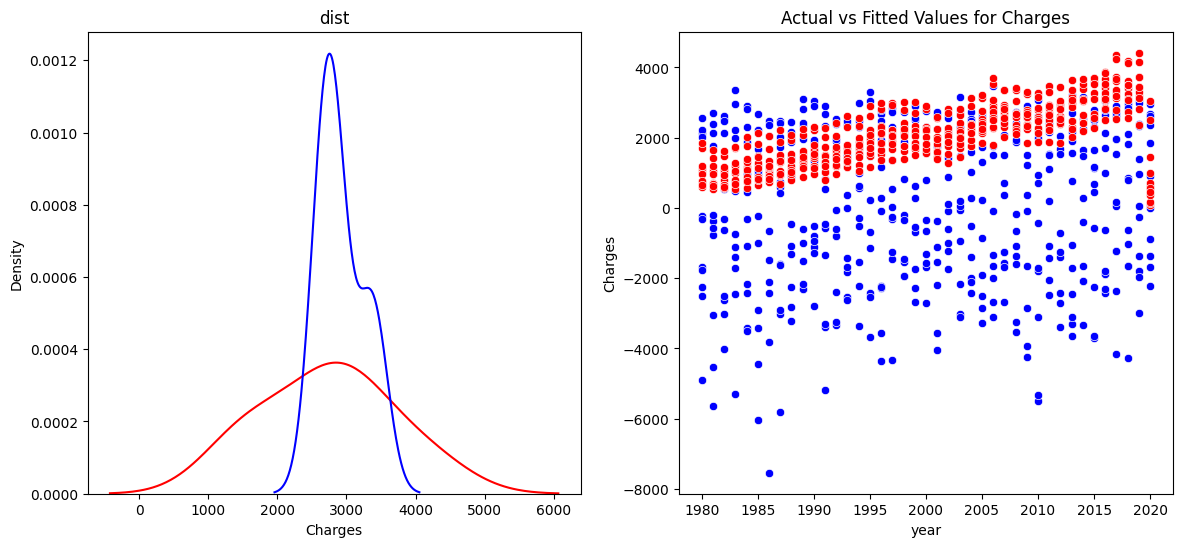

The R-square for test data is:  -1.2251041473540054
The mean square error of actual and predicted value for 8 month is:  1.49142355e+06


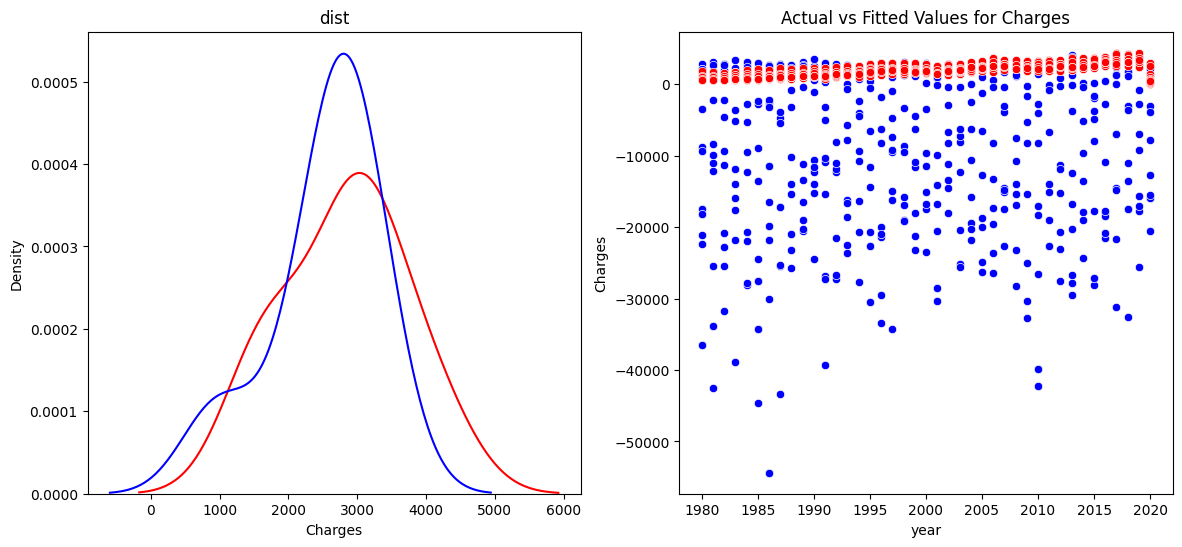

The R-square for test data is:  0.06591706166757327
The mean square error of actual and predicted value for 9 month is:  4.18783809e+05


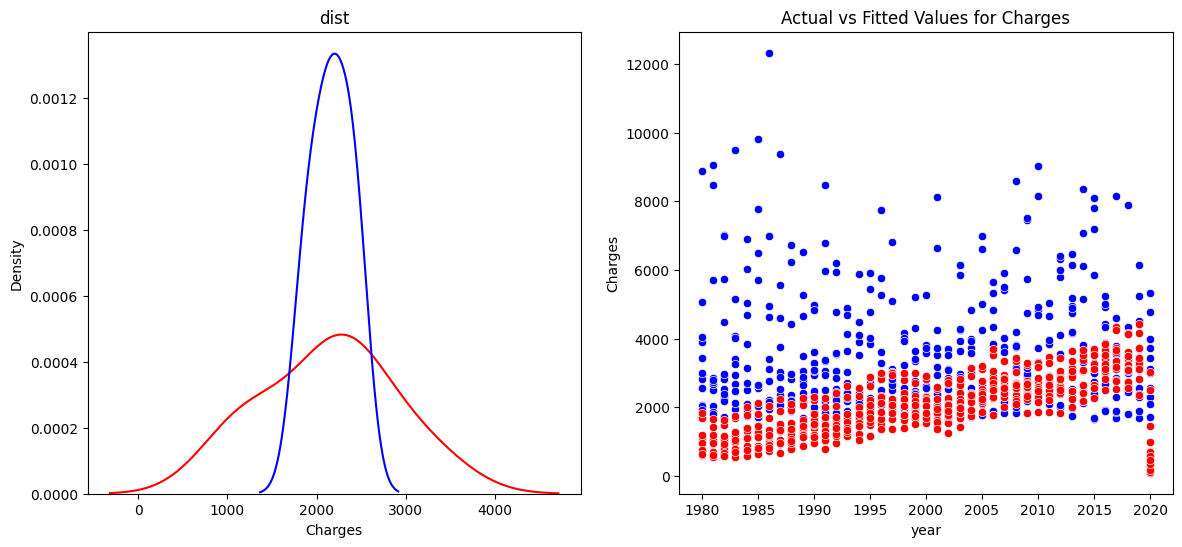

The R-square for test data is:  0.07922742971053198
The mean square error of actual and predicted value for 10 month is:  6.22459650e+05


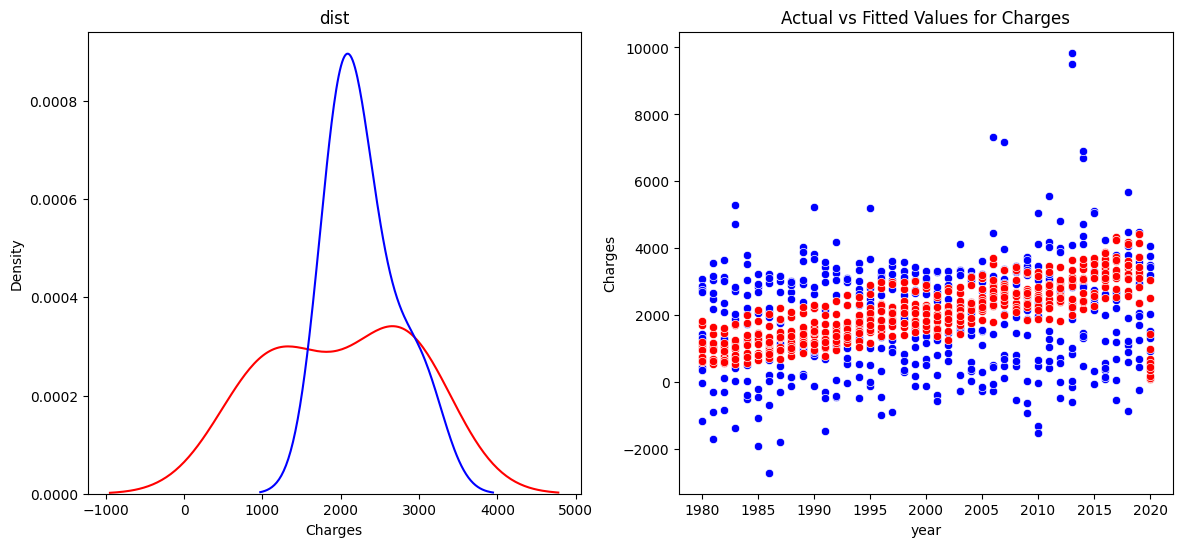

The R-square for test data is:  0.09429144732091499
The mean square error of actual and predicted value for 11 month is:  5.44478785e+05


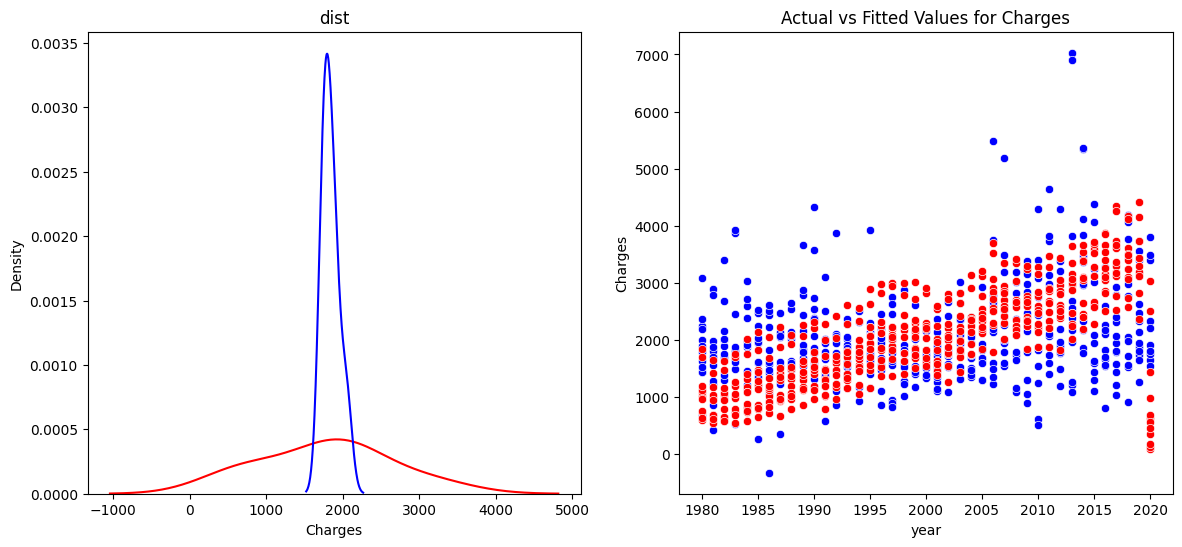

The R-square for test data is:  0.052512851511462344
The mean square error of actual and predicted value for 12 month is:  6.06927705e+05


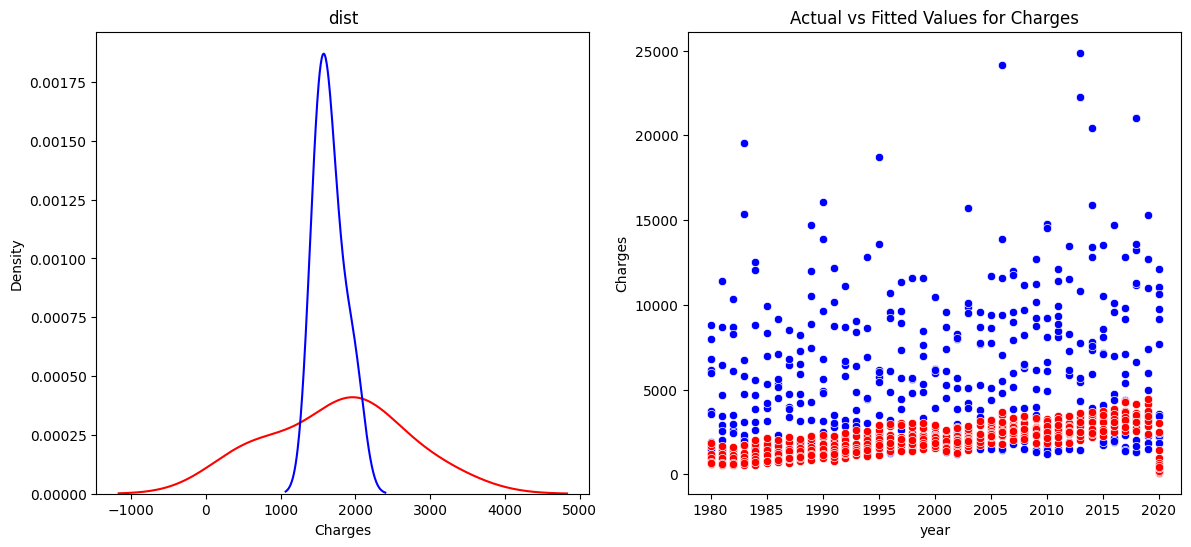

In [58]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

for i in range(1,13):
    y_data1 = weather_tourists_df.loc[weather_tourists_df["month"] == i]['Charges']
    x_data1=weather_tourists_df.drop('Charges',axis=1).loc[weather_tourists_df["month"] == i]

    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size=0.15, random_state=1)

    pipe.fit(x_train1[["cloud_cover", "mean_temp"]], y_train1)
    ypipe_w_t=pipe.predict(x_test1[["cloud_cover", "mean_temp"]])

    print('The R-square for test data is: ', r2_score(y_test1, ypipe_w_t))
    print(f'The mean square error of actual and predicted value for {i} month is: ',
      f"{mean_squared_error(y_test1, ypipe_w_t):.8e}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    ax1 = sns.distplot(y_test1, hist=False, color="r", label="Actual Value", ax=axes[0])
    sns.distplot(ypipe_w_t, hist=False, color="b", label="Fitted Values" , ax=axes[0])

    sns.scatterplot(x=weather_tourists_df.sort_values(by=["year"])["year"], y=pipe.predict(weather_tourists_df.sort_values(by=["year"])[["cloud_cover", "mean_temp"]]), color='b', ax=axes[1])
    sns.scatterplot(x=weather_tourists_df["year"], y=weather_tourists_df["Charges"], color='r', ax=axes[1])

    axes[0].set_title('dist')
    axes[1].set_title('scatter')

    plt.title("Actual vs Fitted Values for Charges")


    plt.show()
    plt.close()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [59]:
tourists_in_df = tourists_in_area_df.merge(tourists_in_purpose_df, on=["year", "month"], how="inner")
del tourists_in_df["Period_y"]
del tourists_in_df["World Total"]

weather_tourists_in_df = tourists_in_df.merge(weather_c_df, on=["year", "month"], how="inner")
weather_tourists_in_df.head()

Period_x  North\nAmerica     Europe  Other\nCountries  year  month  \
0   2019 January        330000.0  1936000.0          563000.0  2019      1   
1  2019 February        213000.0  1742000.0          418000.0  2019      2   
2     2019 March        356000.0  2365000.0          407000.0  2019      3   
3     2019 April        319000.0  2417000.0          462000.0  2019      4   
4       2019 May        570000.0  2219000.0          650000.0  2019      5   

     Holiday  Business  Visiting friends\nor relatives  Miscellaneous  \
0   973000.0  652000.0                       1025000.0       181000.0   
1   844000.0  621000.0                        724000.0       183000.0   
2  1147000.0  850000.0                        923000.0       209000.0   
3  1403000.0  604000.0                        960000.0       232000.0   
4  1388000.0  754000.0                       1101000.0       196000.0   

       Total  tmax  tmin  af  rain  
0  2830000.0   6.7   1.0  13  22.1  
1  2372000.0  11.6   1.7  11  26.6  
2  3129000.0  12.2   4.5   1  37.4  
3  3199000.0  15.0   2.8   7  10.8  
4  3438000.0  17.1   6.6   0  41.4

In [60]:
tourists_out_df = tourists_out_area_df.merge(tourists_out_purpose_df, on=["year", "month"], how="inner")
del tourists_out_df["Period_y"]
del tourists_out_df["World Total"]

weather_tourists_out_df = tourists_out_df.merge(weather_c_df, on=["year", "month"], how="inner")
weather_tourists_out_df.head()

Period_x  North\nAmerica     Europe  Other\nCountries  year  month  \
0   2019 January        435000.0  4207000.0         1507000.0  2019      1   
1  2019 February        231000.0  4210000.0         1096000.0  2019      2   
2     2019 March        204000.0  5096000.0         1172000.0  2019      3   
3     2019 April        493000.0  6252000.0         1662000.0  2019      4   
4       2019 May        565000.0  6510000.0         1153000.0  2019      5   

     Holiday  Business  Visiting friends\nor relatives  Miscellaneous  \
0  2706000.0  597000.0                       2719000.0       127000.0   
1  3155000.0  886000.0                       1405000.0        93000.0   
2  3879000.0  749000.0                       1671000.0       174000.0   
3  5041000.0  836000.0                       2387000.0       143000.0   
4  5483000.0  781000.0                       1796000.0       168000.0   

       Total  tmax  tmin  af  rain  
0  6149000.0   6.7   1.0  13  22.1  
1  5538000.0  11.6   1.7  11  26.6  
2  6473000.0  12.2   4.5   1  37.4  
3  8406000.0  15.0   2.8   7  10.8  
4  8228000.0  17.1   6.6   0  41.4

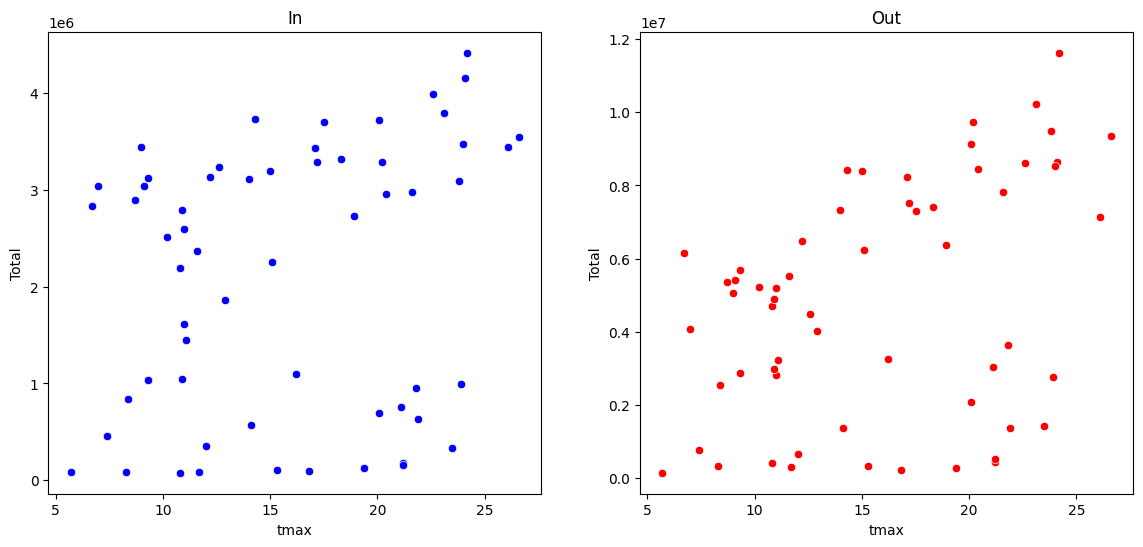

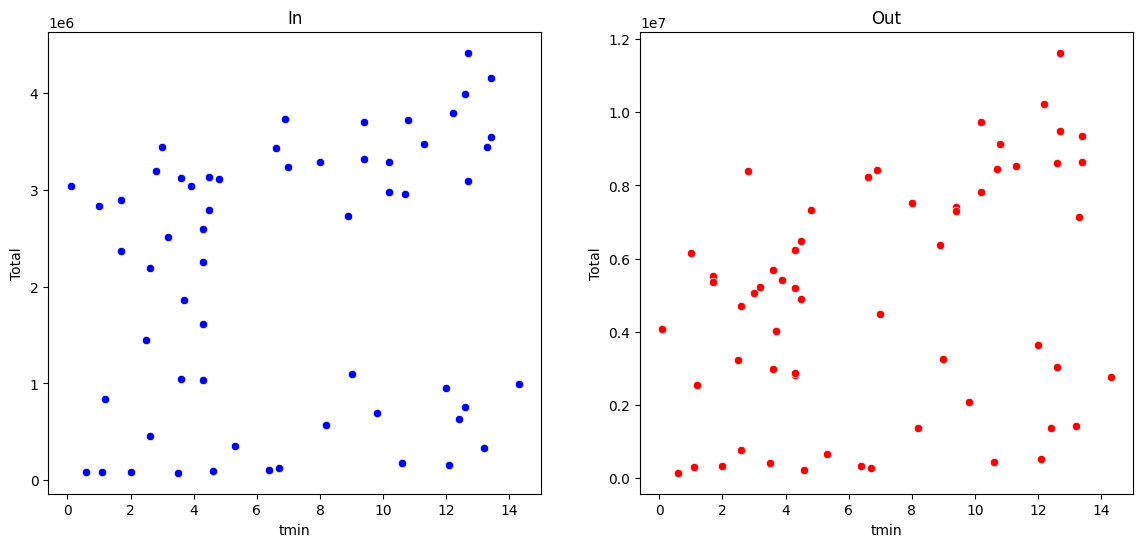

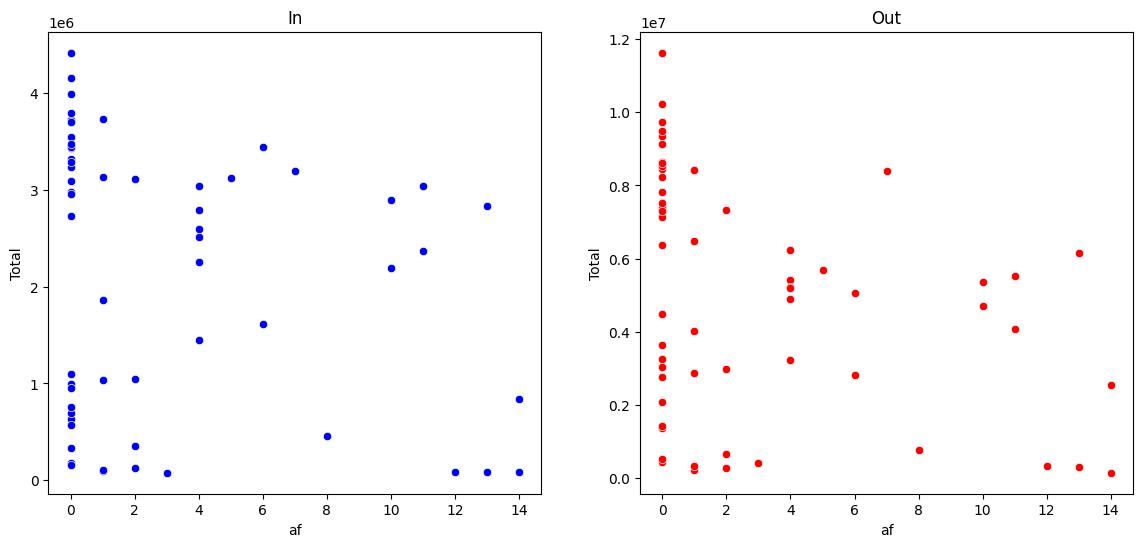

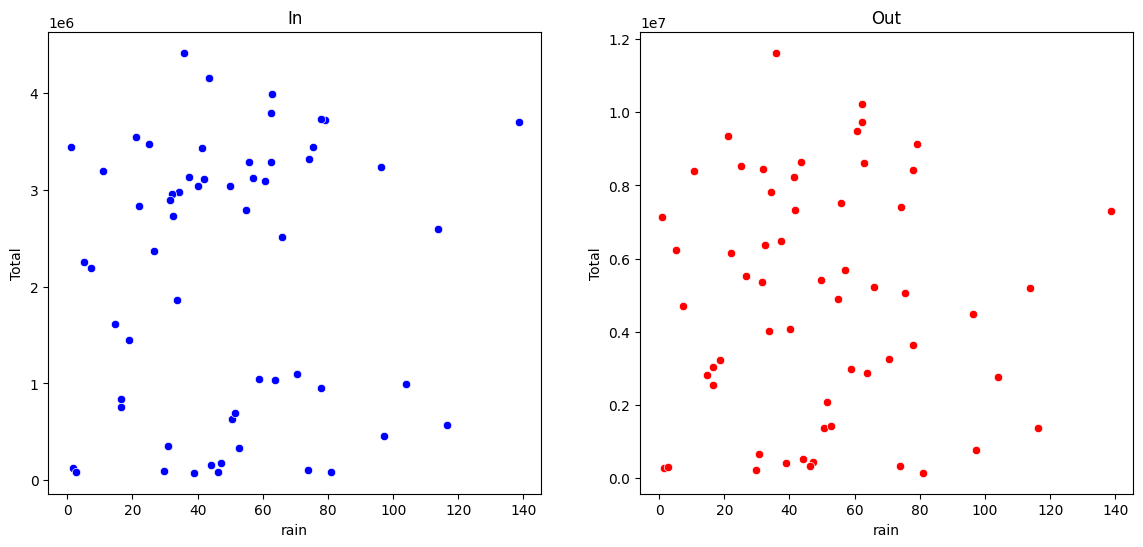

In [61]:
for i in ["tmax", "tmin", "af", "rain"]:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.scatterplot(x=weather_tourists_in_df[i], y=weather_tourists_in_df['Total'], color='b', ax=axes[0])
    axes[0].set_title('In')
    sns.scatterplot(x=weather_tourists_out_df[i], y=weather_tourists_out_df['Total'], color='r', ax=axes[1])
    axes[1].set_title('Out')
    # plt.title(f'{i} - Charges')
    plt.show()

In [62]:
weather_tourists_in_df.drop(["year", "month", "Period_x"], axis=1).corr()[["tmax", "tmin", "af", "rain"]].drop(["tmax", "tmin", "af", "rain"])


tmax      tmin        af      rain
North\nAmerica                  0.421854  0.386455 -0.328468 -0.015356
Europe                          0.118252  0.110233 -0.152773  0.064795
Other\nCountries                0.299110  0.288748 -0.198539  0.046391
Holiday                         0.321587  0.293236 -0.260470  0.061628
Business                        0.020219  0.022046 -0.117449  0.066411
Visiting friends\nor relatives  0.149599  0.150063 -0.135646  0.011166
Miscellaneous                   0.233660  0.216095 -0.198951  0.059351
Total                           0.215965  0.202203 -0.199943  0.049041

In [63]:
weather_tourists_out_df.drop(["year", "month", "Period_x"], axis=1).corr()[["tmax", "tmin", "af", "rain"]].drop(["tmax", "tmin", "af", "rain"])

tmax      tmin        af      rain
North\nAmerica                  0.262508  0.218178 -0.185892 -0.021710
Europe                          0.459270  0.421646 -0.352119  0.001756
Other\nCountries                0.021114 -0.034103  0.004937 -0.084308
Holiday                         0.479917  0.431860 -0.366642  0.003668
Business                        0.027398  0.002974 -0.093255  0.058866
Visiting friends\nor relatives  0.193046  0.169670 -0.101980 -0.091121
Miscellaneous                   0.162580  0.152104 -0.212560  0.080197
Total                           0.389136  0.347465 -0.294094 -0.013125

Залежність з усім, окрім кількості дощових днів на місяць. Також кількість бізнес поїздок не залежить від погоди.

Поліноміальні регресійні моделі для кожної категорії

North
America
The R-square for in is:  -0.11921241931858617
The R-square for out is:  0.3156706873874271
The mean square error of actual and predicted value in is:  1.53799684e+10
The mean square error of actual and predicted value out is:  7.33187046e+09



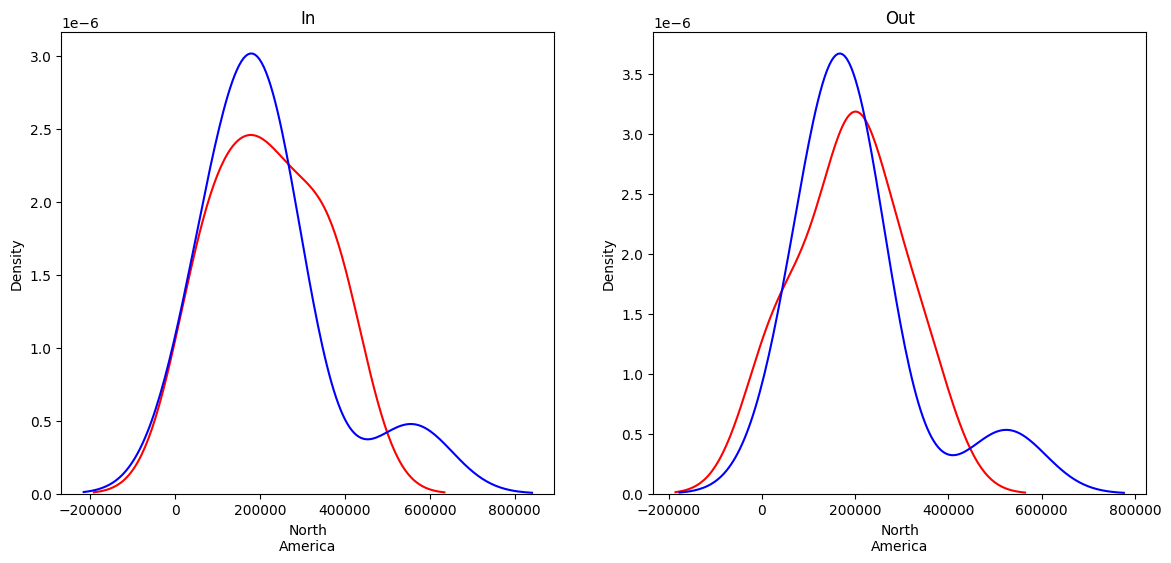

Europe
The R-square for in is:  -0.7520182574073582
The R-square for out is:  -1.598885299415338
The mean square error of actual and predicted value in is:  6.53326354e+11
The mean square error of actual and predicted value out is:  3.64545063e+12



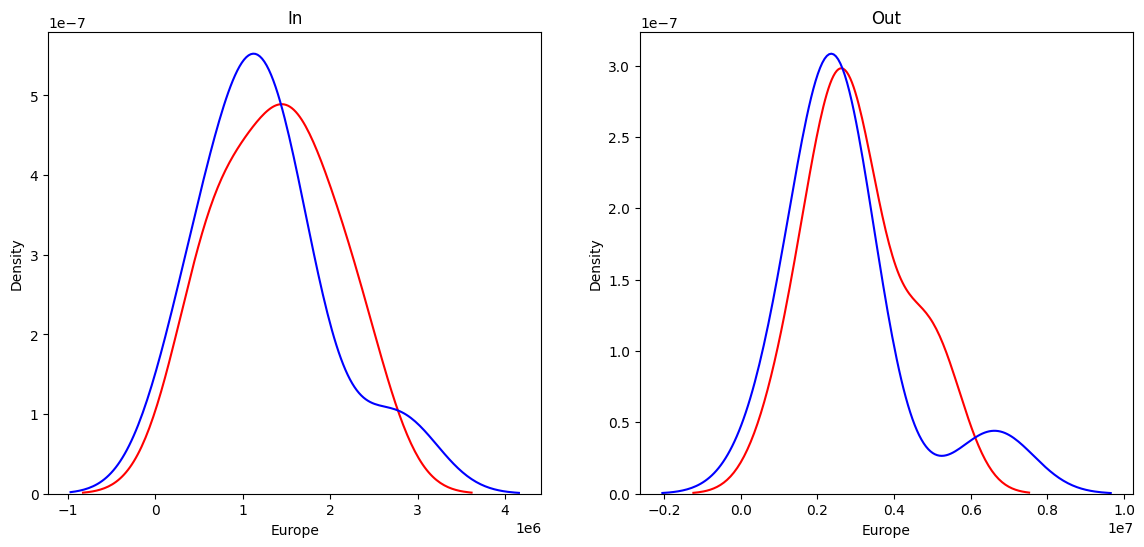

Other
Countries
The R-square for in is:  -0.19477593414761873
The R-square for out is:  -0.14341063980142632
The mean square error of actual and predicted value in is:  1.98006528e+10
The mean square error of actual and predicted value out is:  1.71267527e+11



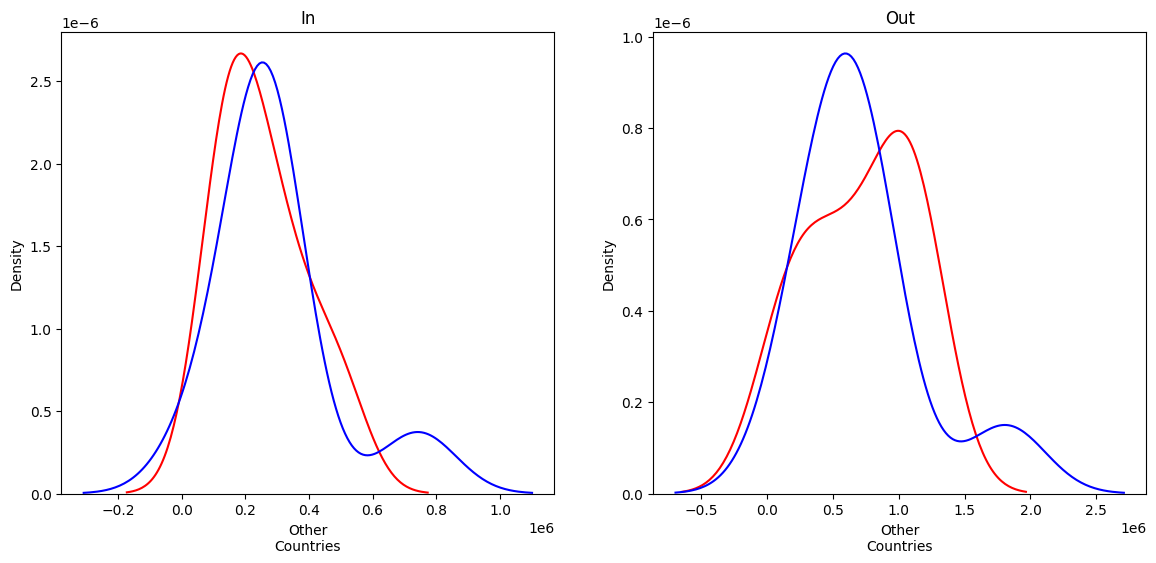

Holiday
The R-square for in is:  -0.6283891369210952
The R-square for out is:  -1.15376798696375
The mean square error of actual and predicted value in is:  1.74561184e+11
The mean square error of actual and predicted value out is:  2.02612697e+12



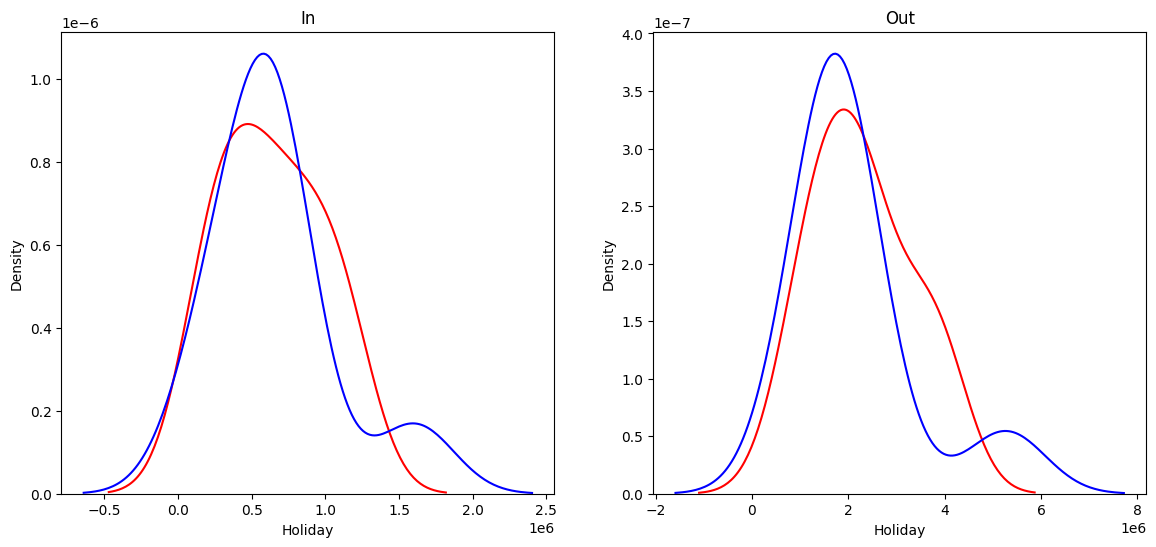

Visiting friends
or relatives
The R-square for in is:  -0.4440848808233455
The R-square for out is:  -1.411931684278298
The mean square error of actual and predicted value in is:  1.46459410e+11
The mean square error of actual and predicted value out is:  5.05813161e+11



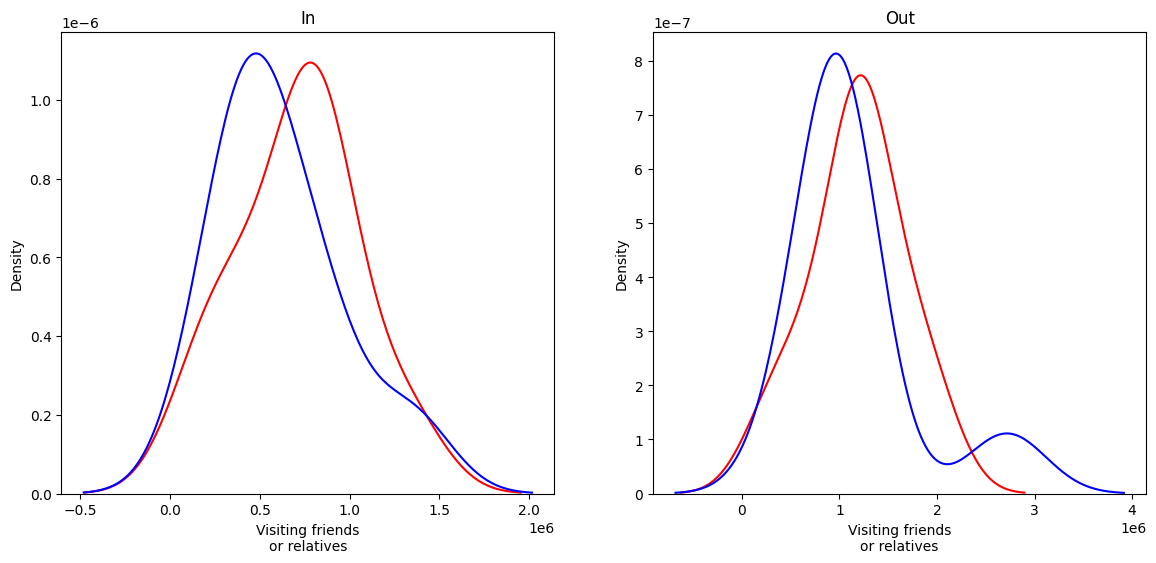

Miscellaneous
The R-square for in is:  -1.0007446057140945
The R-square for out is:  -0.1350728228994742
The mean square error of actual and predicted value in is:  6.30446976e+09
The mean square error of actual and predicted value out is:  3.40723638e+09



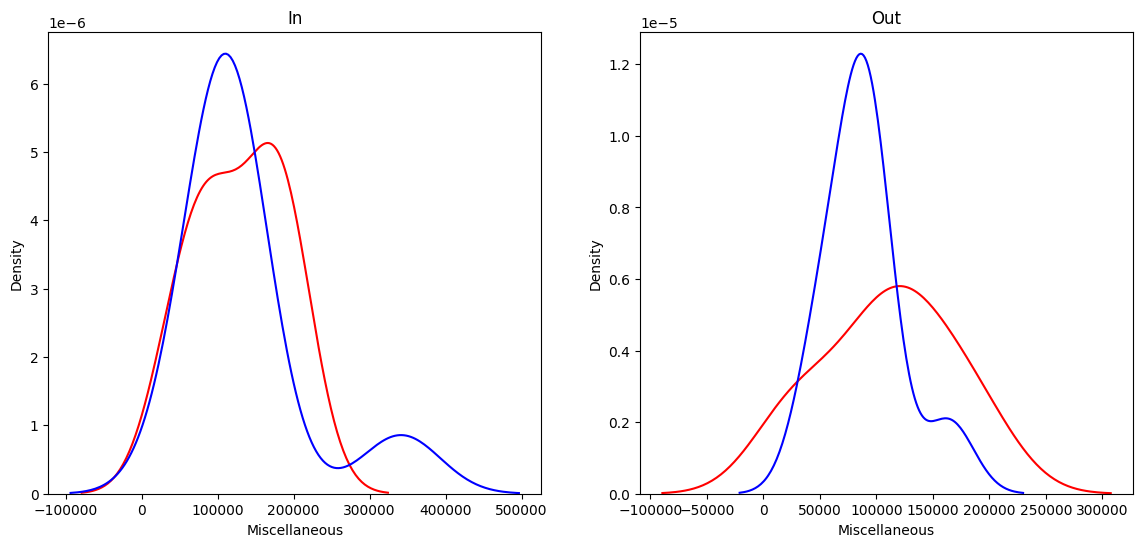

Total
The R-square for in is:  -0.5277308915729972
The R-square for out is:  -1.2492832591710576
The mean square error of actual and predicted value in is:  1.08886126e+12
The mean square error of actual and predicted value out is:  5.67157163e+12



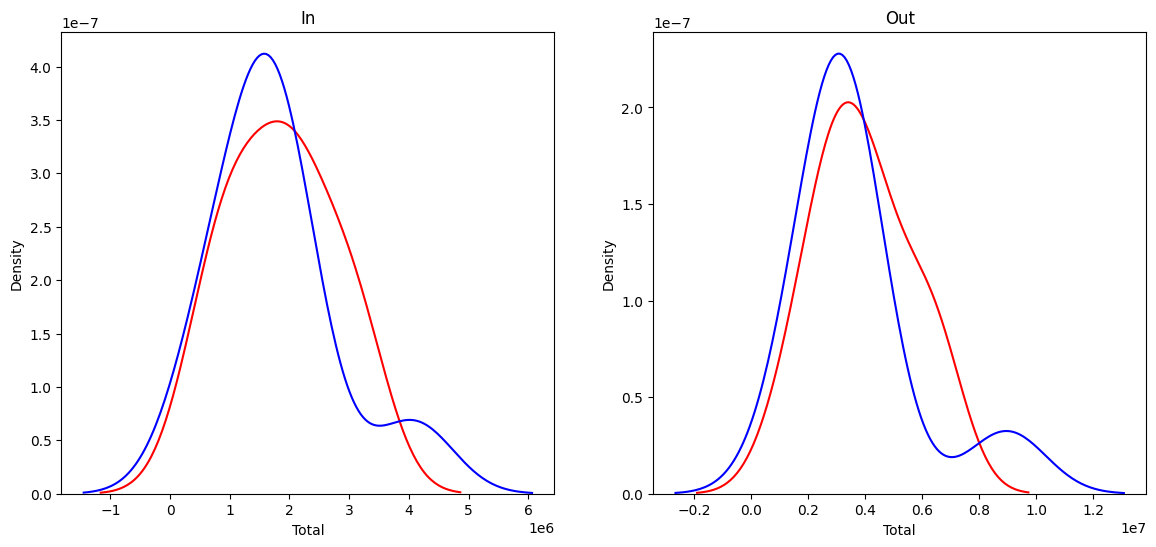

In [64]:
x_data_in = weather_tourists_in_df[["tmax", "tmin", "af"]]
x_data_out = weather_tourists_in_df[["tmax", "tmin", "af"]]

for i in ["North\nAmerica", "Europe", "Other\nCountries", "Holiday", "Visiting friends\nor relatives", "Miscellaneous", "Total"]:
    y_data_in = weather_tourists_in_df[i]
    y_data_out = weather_tourists_out_df[i]
    
    x_train_in, x_test_in, y_train_in, y_test_in = train_test_split(x_data_in, y_data_in, test_size=0.15, random_state=1)
    x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(x_data_out, y_data_out, test_size=0.15, random_state=1)

    pipe.fit(x_train_in, y_train_in)
    ypipe_in=pipe.predict(x_test_in)
    pipe.fit(x_train_out, y_train_out)
    ypipe_out=pipe.predict(x_test_out)

    print(i)
    print('The R-square for in is: ', r2_score(y_test_in, ypipe_in))
    print('The R-square for out is: ', r2_score(y_test_out, ypipe_out))
    print(f'The mean square error of actual and predicted value in is: ',
      f"{mean_squared_error(y_test_in, ypipe_in):.8e}")
    print(f'The mean square error of actual and predicted value out is: ',
      f"{mean_squared_error(y_test_out, ypipe_out):.8e}\n")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    ax1 = sns.distplot(y_test_in, hist=False, color="r", label="Actual Value", ax=axes[0])
    sns.distplot(ypipe_in, hist=False, color="b", label="Fitted Values" , ax=axes[0])

    ax1 = sns.distplot(y_test_out, hist=False, color="r", label="Actual Value", ax=axes[1])
    sns.distplot(ypipe_out, hist=False, color="b", label="Fitted Values" , ax=axes[1])

    axes[0].set_title('In')
    axes[1].set_title('Out')

    plt.show()
    plt.close()